In [158]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [159]:
original=pd.read_csv('avocado.csv')

In [160]:
avo=pd.read_csv('avocado.csv')
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [161]:
avo.drop('Unnamed: 0',axis=1, inplace=True)

In [162]:
avo.shape

(1517, 13)

In [163]:
avo.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'], dtype='object')

In [164]:
avo.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [165]:
# only date, type and region are object,
# though reason is also int, but it can be considered categorical
# rest all are float

In [166]:
# let's parse the Date column
avo['Date1']=pd.to_datetime(avo['Date'])

In [167]:
avo['Date']=pd.to_datetime(avo['Date'])
avo.drop('Date1',axis=1, inplace=True)

In [168]:
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [169]:
# here, date is not of much significance
# Total bags is also a sum of Small, Large and XL bags, so it is repetitive

In [170]:
# from date, we can find the day and whether it is weekday or weekend
# We can also find month

In [171]:
# let's first check for the null values
avo.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [172]:
# there are no missing values

In [173]:
# now, let's engineer the date column
avo['dayofweek']=avo['Date'].dt.dayofweek
# monday--> 0 to Sunday--> 6

In [174]:
avo['weekdayname']=avo['Date'].dt.weekday_name

In [175]:
avo['month']=avo['Date'].dt.month

In [176]:
avo['is_weekend']=0
for i in range(0,len(avo)):
    if (avo['dayofweek'][i]==5) | (avo['dayofweek'][i]==6):
        avo['is_weekend'][i]=1
    else:
        avo['is_weekend'][i]=0

In [177]:
avo[['is_weekend','dayofweek']].head(10)

,is_weekend,dayofweek
0,1,6
1,1,6
2,1,6
3,0,4
4,1,6
5,1,6
6,1,6
7,0,1
8,1,6
9,1,6


In [178]:
avo['is_weekend'].value_counts()

1    1051
0     466
Name: is_weekend, dtype: int64

In [179]:
avo['quarter']=avo['Date'].dt.quarter

In [180]:
avo['quarter']

0       4
1       4
2       4
3       2
4       4
       ..
1512    4
1513    3
1514    1
1515    3
1516    3
Name: quarter, Length: 1517, dtype: int64

In [181]:
avo['week']=avo['Date'].dt.week

In [182]:
# we have created some new features, let's see which one of them are useful

In [183]:
avo.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,dayofweek,weekdayname,month,is_weekend,quarter,week
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,6,Sunday,12,1,4,52
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,6,Sunday,12,1,4,51


In [184]:
# weekdayname and dayofweek are repetitive
# drop weekdayname
avo.drop('weekdayname',axis=1,inplace=True)
avo.head(1)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,dayofweek,month,is_weekend,quarter,week
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,6,12,1,4,52


In [185]:
# let's visualize dayofweek
avo['dayofweek'].value_counts()

6    992
0    149
4    128
1    111
5     59
3     54
2     24
Name: dayofweek, dtype: int64

In [186]:
# most records are from sunday
avo.groupby('dayofweek').mean()[['AveragePrice']]

,AveragePrice
dayofweek,
0,1.081208
1,1.035586
2,1.052917
3,1.014259
4,1.033047
5,1.120678
6,1.085000


In [187]:
# not much difference in the avg price based on day

In [188]:
avo['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
SouthCarolina          24
Denver                 24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
MiamiFtLauderdale      17
DallasFtWorth          17
Roanoke     

In [189]:
pd.crosstab(avo['dayofweek'],avo['region'])

region,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,Columbus,DallasFtWorth,Denver,Detroit,GrandRapids,GreatLakes,HarrisburgScranton,HartfordSpringfield,Houston,Indianapolis,Jacksonville,LasVegas,LosAngeles,Louisville,MiamiFtLauderdale,Midsouth,Nashville,NewYork,Northeast,NorthernNewEngland,Orlando,Philadelphia,PhoenixTucson,Pittsburgh,Plains,Portland,RaleighGreensboro,RichmondNorfolk,Roanoke,SanDiego,SanFrancisco,Seattle,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
dayofweek,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5,4,4,5,3,1,5,4,4,5,3,4,4,5,4,3,0,5,2,4,1,0,3,2,0,4,5,1,1,4,1,5,0,1,2,2,0,4,4,2,0,4,4,0,5,3,3,3,4,3,4
1,5,6,8,5,5,6,7,1,1,4,0,0,4,0,0,0,2,1,0,4,0,0,4,0,3,0,4,0,4,0,0,4,4,0,4,0,4,0,4,0,1,0,4,0,4,0,0,4,0,4,0
2,2,0,0,2,1,0,2,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1
3,2,2,2,2,1,0,2,1,2,2,1,1,2,2,1,1,0,2,0,2,0,0,1,0,0,2,2,0,1,1,0,2,0,0,1,0,0,1,2,0,0,1,2,0,2,1,1,1,1,2,2
4,4,6,7,4,8,7,7,1,1,3,2,2,3,1,1,2,2,2,2,3,1,0,2,2,2,2,3,1,2,2,1,4,2,1,2,2,2,1,3,2,1,2,3,1,4,2,2,2,2,2,2
5,4,1,2,6,6,3,6,4,0,1,1,1,0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,0,1
6,45,35,42,41,38,34,47,19,15,32,10,15,27,14,11,11,9,18,10,28,7,2,24,11,13,16,29,8,21,13,9,35,16,8,21,10,15,10,25,9,7,15,26,6,33,9,11,24,16,25,17


In [190]:
# it clearly shows that in each region, the max sale is on Sundays

In [191]:
avo.groupby('dayofweek').mean()[['Total Volume']]

,Total Volume
dayofweek,
0,1.919464e+06
1,1.223637e+06
2,2.525574e+06
3,2.092051e+06
4,1.705710e+06
5,1.715780e+06
6,1.527299e+06


In [192]:
avo.groupby('dayofweek').mean()[['Total Bags']]

,Total Bags
dayofweek,
0,316409.810671
1,243842.005586
2,440893.894583
3,282185.857593
4,317899.742812
5,371215.203729
6,285043.751391


In [193]:
# though the maximum number of records suggest highest sale on Sunday,
# but the highest sale is on Wed followed by Thu and Mon 

In [194]:
# let's visualize month
avo['month'].value_counts()

5     160
3     158
8     157
1     141
12    136
6     134
11    131
4     124
2     100
10     98
9      91
7      87
Name: month, dtype: int64

In [195]:
avo.groupby('month').mean()[['AveragePrice']]

,AveragePrice
month,
1,1.034894
2,1.105400
3,1.066962
4,1.071532
5,1.070938
6,1.047388
7,1.085632
8,1.070955
9,1.074176


In [196]:
# not much deviation in avg price

In [197]:
avo.groupby('month').mean()[['Total Volume']]

,Total Volume
month,
1,1.921481e+06
2,1.518207e+06
3,1.813050e+06
4,1.794858e+06
5,2.007637e+06
6,1.777940e+06
7,1.851712e+06
8,1.436824e+06
9,1.127477e+06


In [198]:
# suggests that max sale is in may

In [199]:
# let's visualize is_weekend
avo['is_weekend'].value_counts()

1    1051
0     466
Name: is_weekend, dtype: int64

In [200]:
avo.groupby('is_weekend').mean()[['AveragePrice']]

,AveragePrice
is_weekend,
0,1.047897
1,1.087003


In [201]:
avo.groupby('is_weekend').mean()[['Total Volume']]

,Total Volume
is_weekend,
0,1.746222e+06
1,1.537879e+06


In [202]:
# the mean volume sold is greater on weekdays

In [203]:
# let's visualize quarter
avo['quarter'].value_counts()

2    418
1    399
4    365
3    335
Name: quarter, dtype: int64

In [204]:
avo.groupby('quarter').mean()[['AveragePrice']]

,AveragePrice
quarter,
1,1.065263
2,1.063565
3,1.075642
4,1.098110


In [205]:
avo.groupby('quarter').mean()[['Total Volume']]

,Total Volume
quarter,
1,1.777472e+06
2,1.870881e+06
3,1.460539e+06
4,1.231590e+06


In [206]:
# drop week
avo.drop('week',axis=1,inplace=True)

In [207]:
# also drop is_weekend as it is not adding any more value
# no change in avg price based on weekend or weekday
avo.drop('is_weekend',axis=1,inplace=True)

# EDA

# Univariate Analysis

In [208]:
avo.head(6)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,dayofweek,month,quarter
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,6,12,4
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,6,12,4
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,6,12,4
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,4,6,2
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,6,11,4
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,6,11,4


In [209]:
# now, drop date also
avo.drop('Date',axis=1,inplace=True)

In [210]:
# also drop ['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']
avo.drop(['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags'],axis=1, inplace=True)

In [211]:
avo.head(2)

,AveragePrice,Total Volume,Total Bags,type,year,region,dayofweek,month,quarter
0,1.33,64236.62,8696.87,conventional,2015,Albany,6,12,4
1,1.35,54876.98,9505.56,conventional,2015,Albany,6,12,4


In [212]:
avo['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [213]:
original['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [214]:
# as there is only one type, drop it
avo.drop('type',axis=1,inplace=True)

In [215]:
avo.head(2)

,AveragePrice,Total Volume,Total Bags,year,region,dayofweek,month,quarter
0,1.33,64236.62,8696.87,2015,Albany,6,12,4
1,1.35,54876.98,9505.56,2015,Albany,6,12,4


In [216]:
avo['year'].value_counts()

2015    1270
2016     247
Name: year, dtype: int64

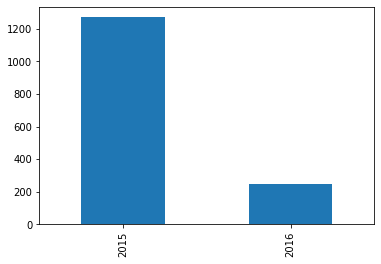

In [217]:
avo['year'].value_counts().plot.bar()

In [218]:
avo['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
SouthCarolina          24
Denver                 24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
MiamiFtLauderdale      17
DallasFtWorth          17
Roanoke     

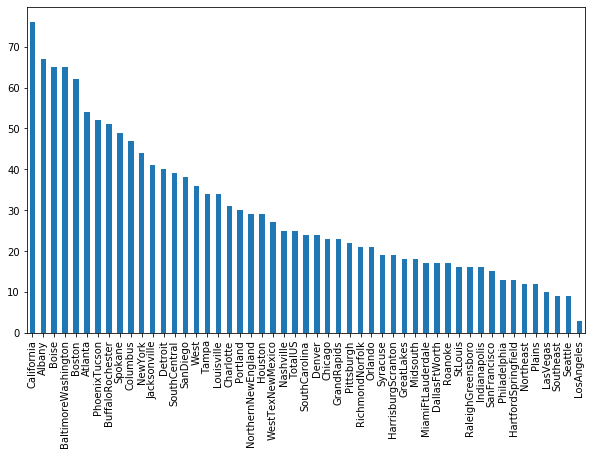

In [219]:
plt.figure(figsize=(10,6))
avo['region'].value_counts().plot.bar()

In [220]:
print(avo['dayofweek'].value_counts())
print('')
print(avo['month'].value_counts())
print('')
print(avo['quarter'].value_counts())

6    992
0    149
4    128
1    111
5     59
3     54
2     24
Name: dayofweek, dtype: int64

5     160
3     158
8     157
1     141
12    136
6     134
11    131
4     124
2     100
10     98
9      91
7      87
Name: month, dtype: int64

2    418
1    399
4    365
3    335
Name: quarter, dtype: int64


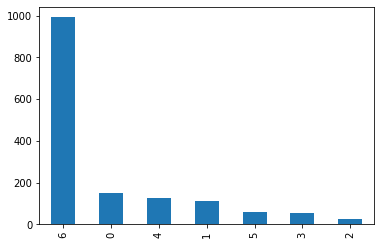

In [221]:
avo['dayofweek'].value_counts().plot.bar()

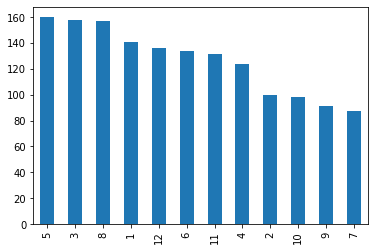

In [222]:
avo['month'].value_counts().plot.bar()

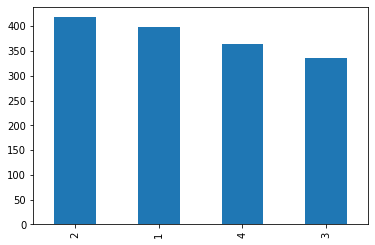

In [223]:
avo['quarter'].value_counts().plot.bar()

In [224]:
# now, let's create a new feature region_en
from sklearn.preprocessing import LabelEncoder
def encode(col):
    le=LabelEncoder()
    avo[col]=pd.Series(le.fit_transform(avo[col]))

In [225]:
encode('region')
avo['region'].tail(10)

1507    7
1508    7
1509    7
1510    7
1511    7
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, dtype: int32

In [226]:
original['region'].tail(10)

1507    Charlotte
1508    Charlotte
1509    Charlotte
1510    Charlotte
1511    Charlotte
1512    Charlotte
1513    Charlotte
1514    Charlotte
1515    Charlotte
1516    Charlotte
Name: region, dtype: object

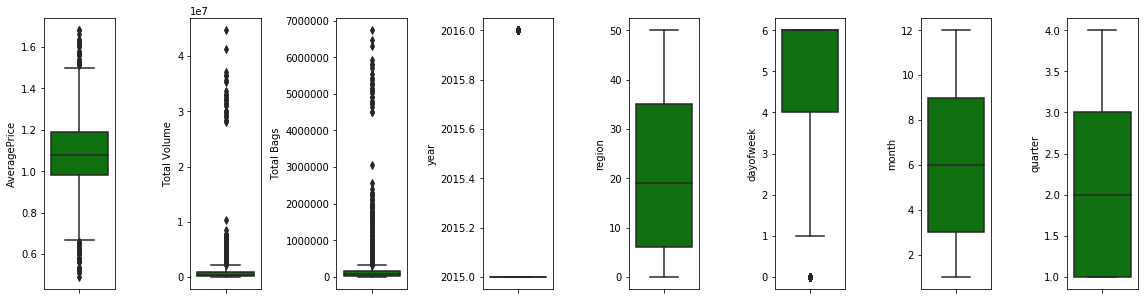

In [227]:
# let's make boxplot
cols=avo.columns.values
plt.figure(figsize=(16,32))
for i in range(len(cols)):
    plt.subplot(8,8,i+1)
    sns.boxplot(avo[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [228]:
# there are outliers in total vol, total bags, dayofweek

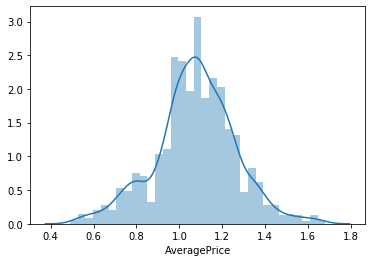

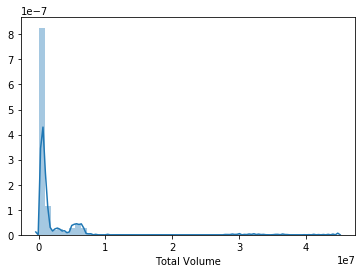

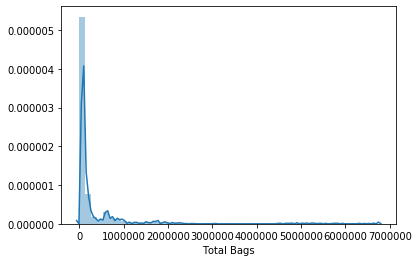

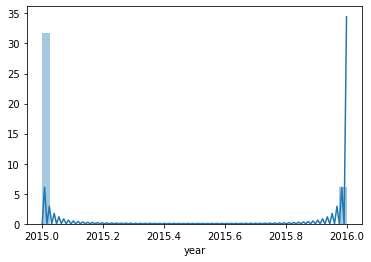

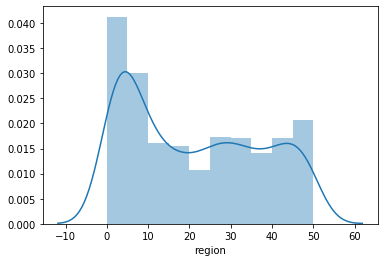

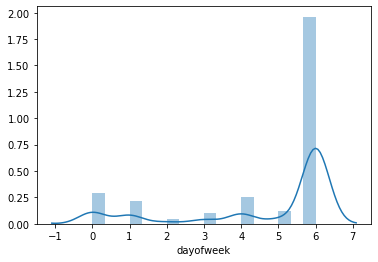

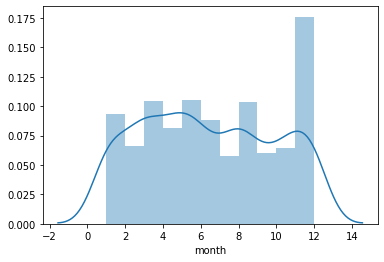

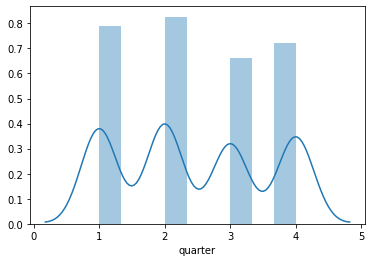

In [229]:
# let's make distplot
for i in cols:
    plt.subplots()
    sns.distplot(avo[i])

In [230]:
# Total volumne, total bags, dayofweek are skewed

In [231]:
avo.skew()

AveragePrice   -0.109444
Total Volume    6.200138
Total Bags      5.366378
year            1.828332
region          0.288146
dayofweek      -1.297576
month           0.101439
quarter         0.104879
dtype: float64

# Bivariate Analysis

In [232]:
avo.head(2)

,AveragePrice,Total Volume,Total Bags,year,region,dayofweek,month,quarter
0,1.33,64236.62,8696.87,2015,0,6,12,4
1,1.35,54876.98,9505.56,2015,0,6,12,4


In [233]:
avo.groupby('year').mean()[['AveragePrice', 'Total Volume', 'Total Bags']]

,AveragePrice,Total Volume,Total Bags
year,,,
2015,1.060110,1.610065e+06,263486.649244
2016,1.151498,1.559787e+06,448417.955992


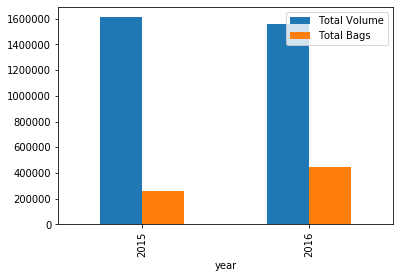

In [234]:
avo.groupby('year').mean()[['Total Volume', 'Total Bags']].plot.bar()

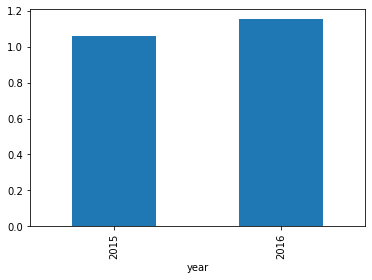

In [235]:
avo.groupby('year').mean()['AveragePrice'].plot.bar()

In [236]:
avo.groupby('region').mean()[['AveragePrice', 'Total Volume', 'Total Bags']]

,AveragePrice,Total Volume,Total Bags
region,,,
0,1.238657,7.629020e+04,1.216629e+04
1,1.012037,4.676372e+05,8.621736e+04
2,1.160923,8.076442e+05,1.846829e+05
3,0.974923,8.104617e+04,2.605436e+04
4,1.205484,5.534586e+05,1.223562e+05
5,1.301569,1.321844e+05,6.661483e+04
6,1.055921,6.035277e+06,1.415122e+06
7,1.311613,1.762781e+05,5.798790e+04
8,1.214783,8.118822e+05,9.829844e+04


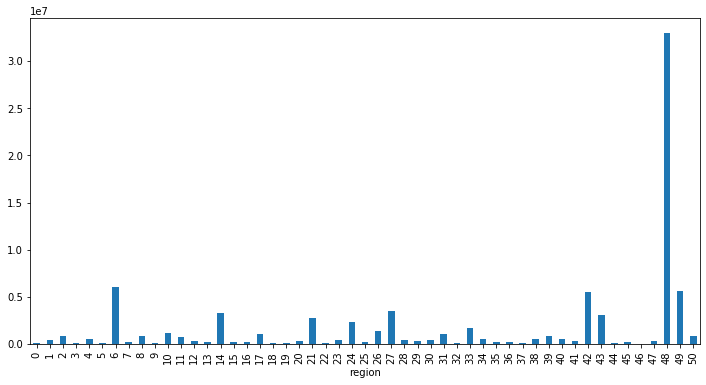

In [237]:
plt.figure(figsize=(12,6))
avo.groupby('region').mean()['Total Volume'].plot.bar()

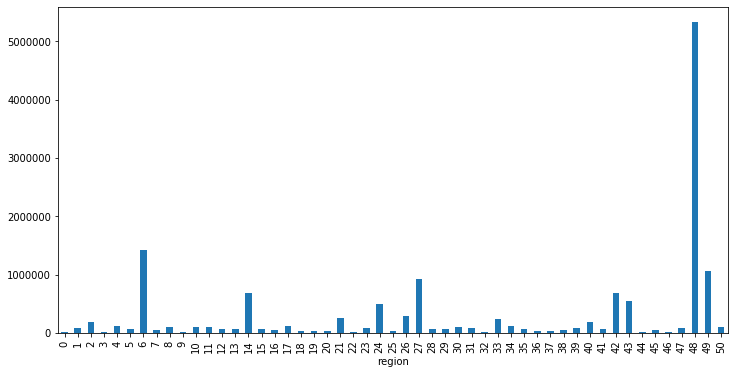

In [238]:
plt.figure(figsize=(12,6))
avo.groupby('region').mean()['Total Bags'].plot.bar()

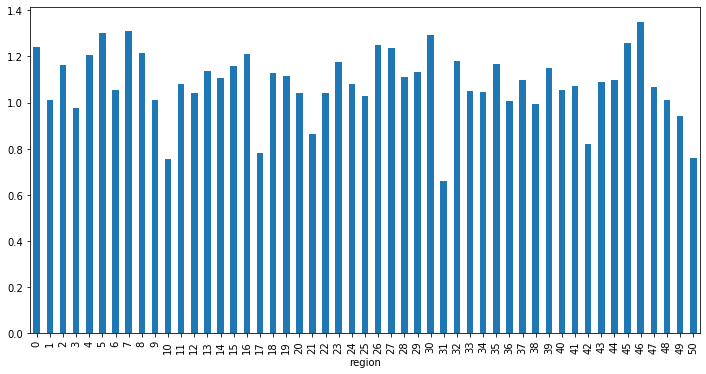

In [239]:
plt.figure(figsize=(12,6))
avo.groupby('region').mean()['AveragePrice'].plot.bar()

In [240]:
avo.groupby('dayofweek').mean()[['AveragePrice', 'Total Volume', 'Total Bags']]

,AveragePrice,Total Volume,Total Bags
dayofweek,,,
0,1.081208,1.919464e+06,316409.810671
1,1.035586,1.223637e+06,243842.005586
2,1.052917,2.525574e+06,440893.894583
3,1.014259,2.092051e+06,282185.857593
4,1.033047,1.705710e+06,317899.742812
5,1.120678,1.715780e+06,371215.203729
6,1.085000,1.527299e+06,285043.751391


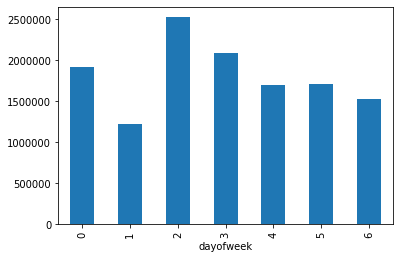

In [241]:
avo.groupby('dayofweek').mean()['Total Volume'].plot.bar()

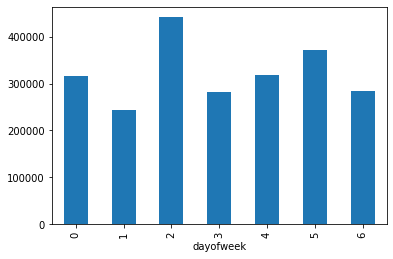

In [242]:
avo.groupby('dayofweek').mean()['Total Bags'].plot.bar()

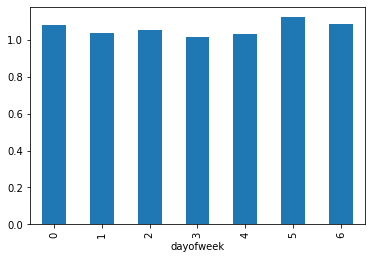

In [243]:
avo.groupby('dayofweek').mean()['AveragePrice'].plot.bar()

In [244]:
avo.groupby('month').mean()[['AveragePrice', 'Total Volume', 'Total Bags']]

,AveragePrice,Total Volume,Total Bags
month,,,
1,1.034894,1.921481e+06,334195.669574
2,1.105400,1.518207e+06,309907.366500
3,1.066962,1.813050e+06,329570.519937
4,1.071532,1.794858e+06,315643.284516
5,1.070938,2.007637e+06,333534.738562
6,1.047388,1.777940e+06,326192.132985
7,1.085632,1.851712e+06,346135.013563
8,1.070955,1.436824e+06,257583.812484
9,1.074176,1.127477e+06,205005.924945


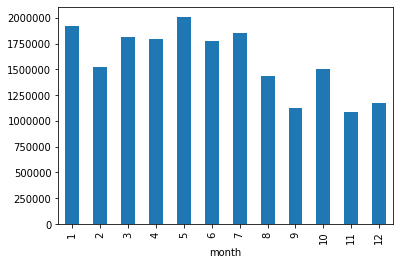

In [245]:
avo.groupby('month').mean()['Total Volume'].plot.bar()

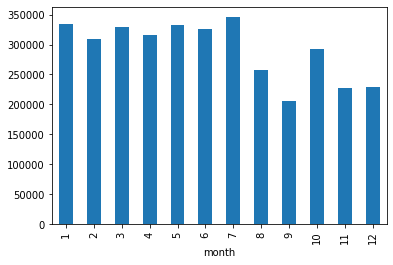

In [246]:
avo.groupby('month').mean()['Total Bags'].plot.bar()

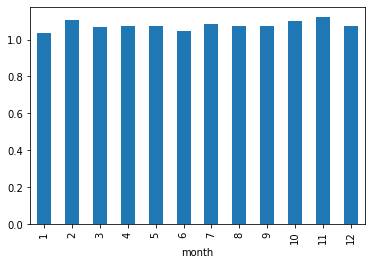

In [247]:
avo.groupby('month').mean()['AveragePrice'].plot.bar()

In [248]:
avo.groupby('quarter').mean()[['AveragePrice', 'Total Volume', 'Total Bags']]

,AveragePrice,Total Volume,Total Bags
quarter,,,
1,1.065263,1.777472e+06,326276.862682
2,1.063565,1.870881e+06,325873.376244
3,1.075642,1.460539e+06,266298.340030
4,1.098110,1.231590e+06,245966.565151


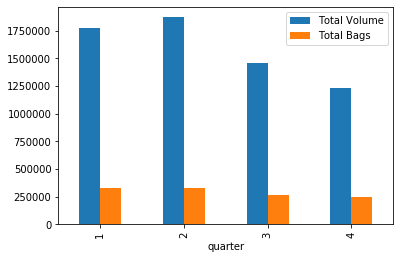

In [249]:
avo.groupby('quarter').mean()[['Total Volume', 'Total Bags']].plot.bar()

In [250]:
pd.crosstab(avo['dayofweek'],avo['region'])

region,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
dayofweek,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5,4,4,5,3,1,5,4,4,5,3,4,4,5,4,3,0,5,2,4,1,0,3,2,0,4,5,1,1,4,1,5,0,1,2,2,0,4,4,2,0,4,4,0,5,3,3,3,4,3,4
1,5,6,8,5,5,6,7,1,1,4,0,0,4,0,0,0,2,1,0,4,0,0,4,0,3,0,4,0,4,0,0,4,4,0,4,0,4,0,4,0,1,0,4,0,4,0,0,4,0,4,0
2,2,0,0,2,1,0,2,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1
3,2,2,2,2,1,0,2,1,2,2,1,1,2,2,1,1,0,2,0,2,0,0,1,0,0,2,2,0,1,1,0,2,0,0,1,0,0,1,2,0,0,1,2,0,2,1,1,1,1,2,2
4,4,6,7,4,8,7,7,1,1,3,2,2,3,1,1,2,2,2,2,3,1,0,2,2,2,2,3,1,2,2,1,4,2,1,2,2,2,1,3,2,1,2,3,1,4,2,2,2,2,2,2
5,4,1,2,6,6,3,6,4,0,1,1,1,0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,0,1
6,45,35,42,41,38,34,47,19,15,32,10,15,27,14,11,11,9,18,10,28,7,2,24,11,13,16,29,8,21,13,9,35,16,8,21,10,15,10,25,9,7,15,26,6,33,9,11,24,16,25,17


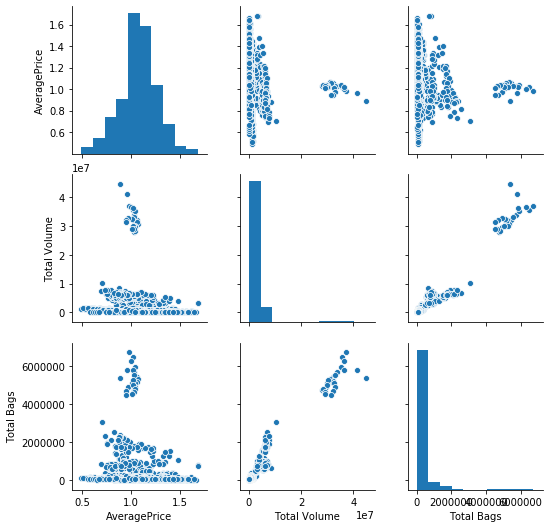

In [251]:
sns.pairplot(data=avo,x_vars=['AveragePrice', 'Total Volume', 'Total Bags'],
             y_vars=['AveragePrice', 'Total Volume', 'Total Bags'])

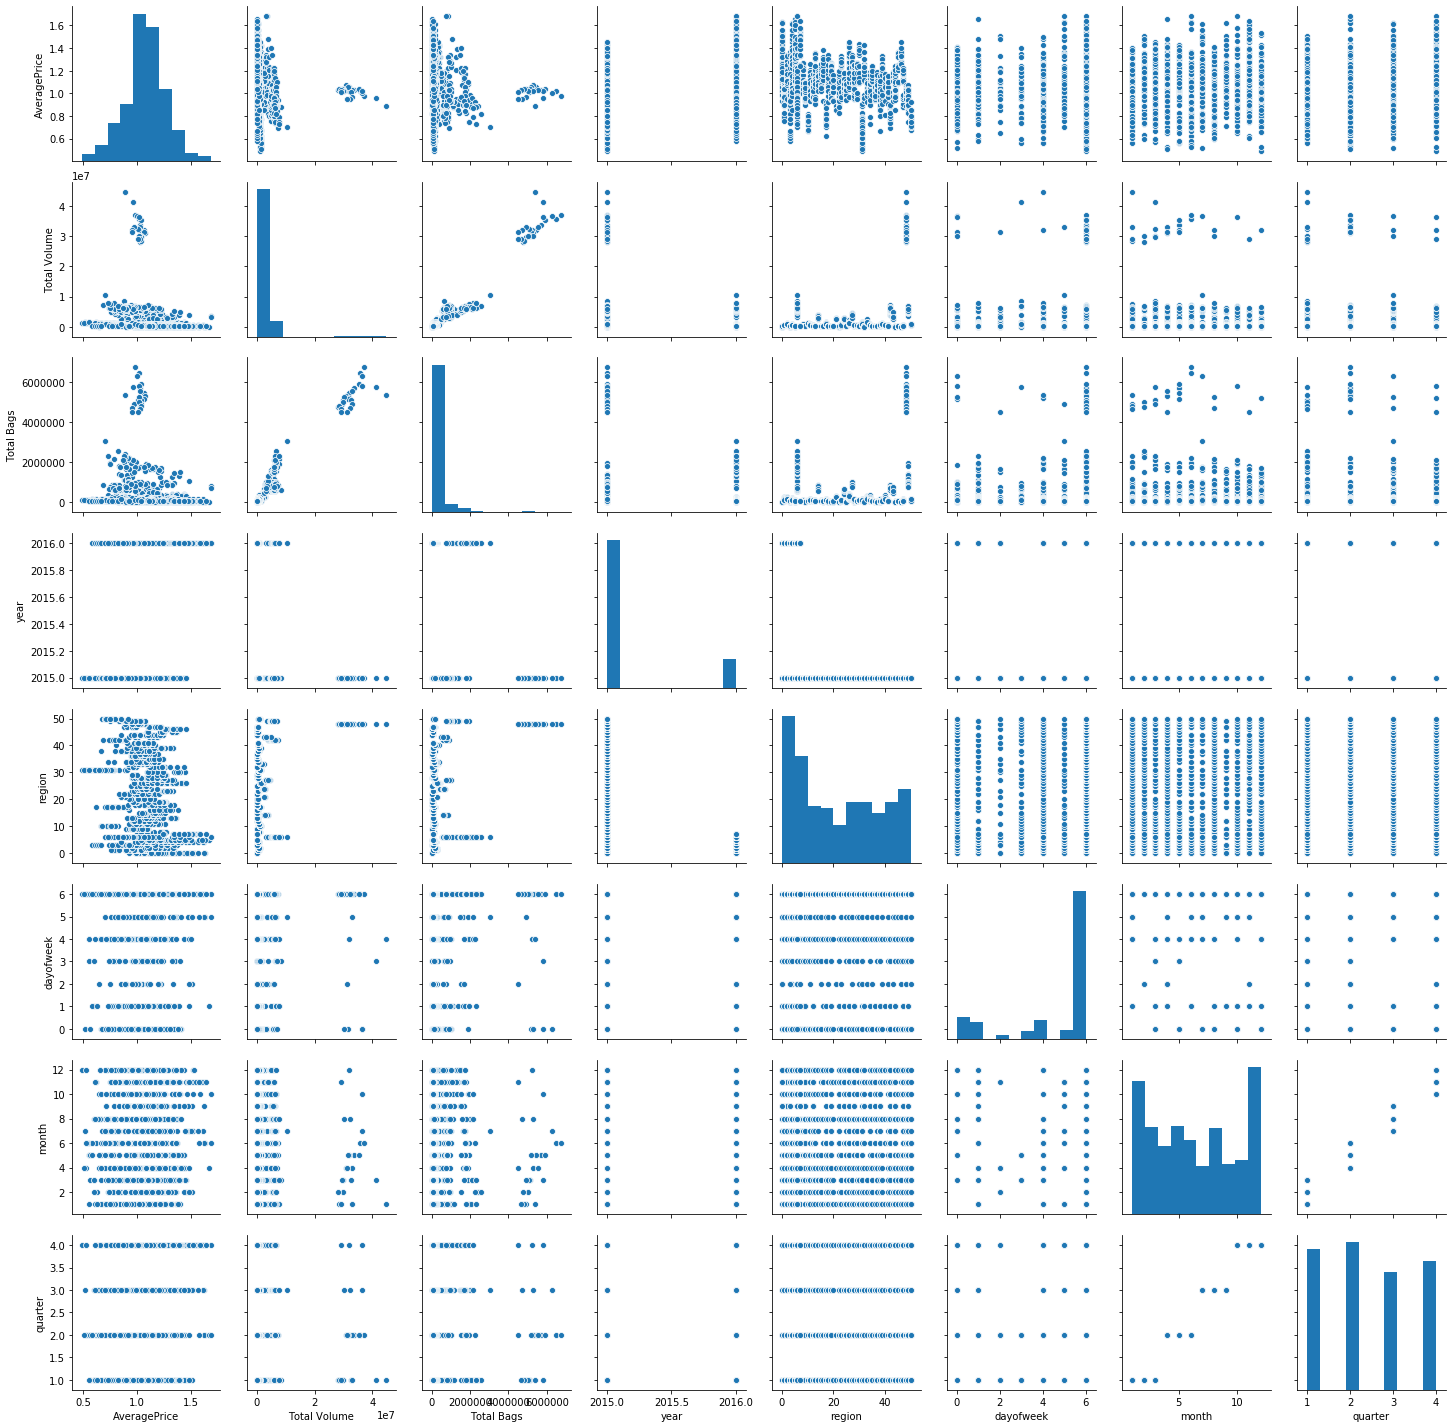

In [252]:
sns.pairplot(avo)

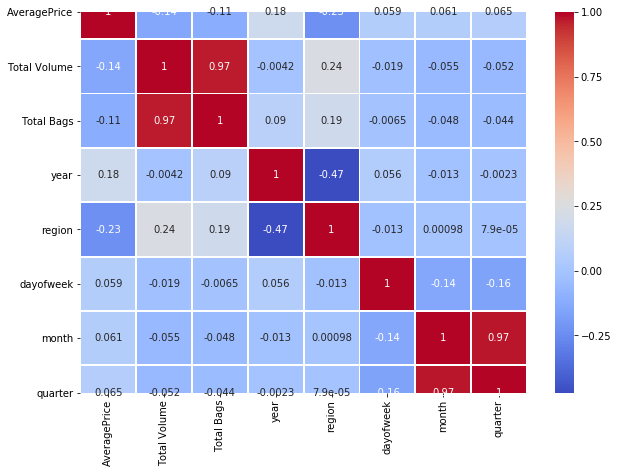

In [253]:
# let's see corr
plt.figure(figsize=(10,7))
sns.heatmap(avo.corr(),annot=True,cmap='coolwarm',linewidths=0.8)

In [254]:
# very high correlation in month and quarter
# drop quarter
# very high correlation in total volume and total bags
# drop total bags
avo.drop(['Total Bags','quarter'], axis=1, inplace=True)

In [255]:
avo.corr()

,AveragePrice,Total Volume,year,region,dayofweek,month
AveragePrice,1.000000,-0.140470,0.178683,-0.229408,0.059500,0.060642
Total Volume,-0.140470,1.000000,-0.004189,0.236579,-0.019227,-0.055212
year,0.178683,-0.004189,1.000000,-0.470472,0.056341,-0.013144
region,-0.229408,0.236579,-0.470472,1.000000,-0.012909,0.000977
dayofweek,0.059500,-0.019227,0.056341,-0.012909,1.000000,-0.139595
month,0.060642,-0.055212,-0.013144,0.000977,-0.139595,1.000000


# Outliers

In [256]:
from scipy.stats import zscore
z=np.abs(zscore(avo))
np.where(z>3)

(array([ 760, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191,
        1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202,
        1203, 1204, 1205, 1206, 1411, 1457, 1458], dtype=int64),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0], dtype=int64))

In [257]:
len(np.where(z>3)[0])

29

In [258]:
# from IQR method
Q1 = avo.quantile(0.25)
Q3 = avo.quantile(0.75)
IQR = Q3 - Q1
avo_out=(avo < (Q1 - 1.5 * IQR)) | (avo > (Q3 + 1.5 * IQR))
avo_out.sum()

AveragePrice     61
Total Volume    230
year            247
region            0
dayofweek       149
month             0
dtype: int64

In [259]:
# let's treat the outliers in price and volume using IQR method

In [260]:
# checking upper bound for every column
def upper(col):
    Q1 = avo[col].quantile(0.25)
    Q3 = avo[col].quantile(0.75)
    IQR = Q3 - Q1
    upper=Q3 + 1.5 * IQR
    return upper

In [261]:

def lower(col):
    Q1 = avo[col].quantile(0.25)
    Q3 = avo[col].quantile(0.75)
    IQR = Q3 - Q1
    lower=Q1 - 1.5 * IQR
    return lower

In [262]:
print(upper('AveragePrice'))
print(upper('Total Volume'))
print(lower('AveragePrice'))
print(lower('Total Volume'))

1.505
2233732.715
0.665
-1104287.645


In [263]:
def remove_outlier(col):
#     def upper(col):
#         Q1 = ball[col].quantile(0.25)
#         Q3 = ball[col].quantile(0.75)
#         IQR = Q3 - Q1
#         upper=Q3 + 1.5 * IQR
#         return upper
    for i in range(avo.shape[0]):
        if (avo[col].iloc[i])>upper(col):
            avo[col].iloc[i]=upper(col)
        elif (avo[col].iloc[i])<lower(col):
            avo[col].iloc[i]=lower(col)

In [264]:
remove_outlier('AveragePrice')
remove_outlier('Total Volume')

In [265]:
# now, check for outliers again
z=np.abs(zscore(avo))
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

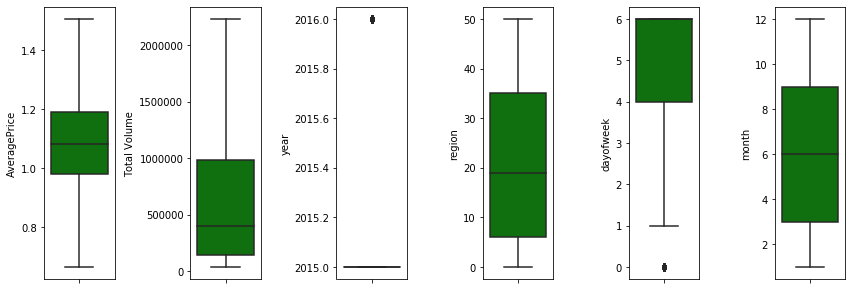

In [266]:
cols=avo.columns.values
plt.figure(figsize=(16,32))
for i in range(len(cols)):
    plt.subplot(8,8,i+1)
    sns.boxplot(avo[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [267]:
# now,okk

# Model Building

# Regression

In [268]:
# now, we'll evaluate different models on data

In [269]:
# first, we'll check the performance of avo data
# then, we'll add some columns to it such as 4046,4225

In [270]:
avo.head(2)

,AveragePrice,Total Volume,year,region,dayofweek,month
0,1.33,64236.62,2015,0,6,12
1,1.35,54876.98,2015,0,6,12


In [271]:
# # seperation of x and y
x=avo.drop('AveragePrice',axis=1)

In [272]:
y=avo['AveragePrice']

In [273]:
# As it is a regression problem, we'll use:
# LinearRegression
# DecisionTreeRegressor
# KNeighborsRegressor
# SVR
# Ridge
# Lasso
# RandomForestRegressor
# XGBRegressor

In [274]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [275]:
# Now, let's define some functions to reuse them
def fit(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    
def get_score(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return train_score,test_score,rmse

def get_pred(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

def get_metrics(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    mse=mean_squared_error(pred,y_test)
    mae=mean_absolute_error(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return mse,rmse,mae

from sklearn.model_selection import GridSearchCV
def gridcv(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
    gkb.fit(x,y)
    return gkb.best_params_


from sklearn.model_selection import RandomizedSearchCV
def randomcv(m,p,x,y):
    from sklearn.model_selection import RandomizedSearchCV
    gkb=RandomizedSearchCV(estimator=m,param_distributions=p,
                          cv=5,n_iter=100,scoring='neg_mean_squared_error',
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)
    gkb.fit(x,y)
    return gkb.best_params_

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
def bfe(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, verbose=3, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    return xbfe

from sklearn.decomposition import PCA
def nforpca(x):
    pca=PCA().fit(x)
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
    plt.xlabel('No of Components')
    plt.ylabel('Variance')
    plt.axhline(y=95, color='r', linestyle='--')
    plt.show()
    
def pca(m,x,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    return xpca

def cross(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1)
    return (score.mean(), score.std())

from sklearn.preprocessing import StandardScaler
def std(x):
    scx=StandardScaler()
    xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)
    return xs

def modified_bfe(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xbfe,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    return test_score

def modified_pca(m,x,y,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    x_train, x_test, y_train, y_test=train_test_split(xpca,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    return test_score

In [276]:
lr=LinearRegression(n_jobs=-1)
dt=DecisionTreeRegressor(random_state=45)
svr=SVR()
knn=KNeighborsRegressor(n_jobs=-1)
rid=Ridge(random_state=45)
ls=Lasso(random_state=45)
rf=RandomForestRegressor(n_jobs=-1,random_state=45)
xgb=XGBRegressor(n_jobs=-1,random_state=45)
ada=AdaBoostRegressor(random_state=45)

# Iteration A

In [277]:
# 1St iteration
print("Model Evaluation with features Avo")
print("LR ", get_score(lr,x,y))
print("DT ", get_score(dt,x,y))
print("SVR ", get_score(svr,x,y))
print("KNN ", get_score(knn,x,y))
print("RID ", get_score(rid,x,y))
print("LS ", get_score(ls,x,y))
print("RF ", get_score(rf,x,y))
print("XGB ", get_score(xgb,x,y))

Model Evaluation with features Avo
LR  (0.1395146791519224, -6.361090438338099, 0.1714456423373625)
DT  (0.996353014094859, 0.5886418635395312, 0.11865855974673546)
SVR  (0.797750536900659, -15.244126028913602, 0.17874229479529713)
KNN  (0.4426924877171304, -1.311135594143051, 0.17417201872075536)
RID  (0.1395136175347491, -6.3736477021800875, 0.1714258479148365)
LS  (0.07938850404464959, -12.62783233124104, 0.17110352838885498)
RF  (0.9486691645756108, 0.5382850618964183, 0.10611812562698943)
XGB  (0.9854837885176645, 0.6212500887717779, 0.0993999294191866)


# Iteration B

In [278]:
# add the total bags feature to present x

In [287]:
x1=x.copy()

In [288]:
x.shape

(1517, 5)

In [289]:
x1['Total Bags']=original['Total Bags']

In [312]:
# remove_outlier('Total Bags')

def gen_lower(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower=Q1 - 1.5 * IQR
    return lower

def gen_upper(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper=Q3 + 1.5 * IQR
    return upper

def gen_remove_outlier(df,col):
    for i in range(df.shape[0]):
        if (df[col].iloc[i])>gen_upper(df,col):
            df[col].iloc[i]=gen_upper(df,col)
        elif (df[col].iloc[i])<gen_lower(df,col):
            df[col].iloc[i]=gen_lower(df,col)

In [300]:
gen_remove_outlier(x1,'Total Bags')

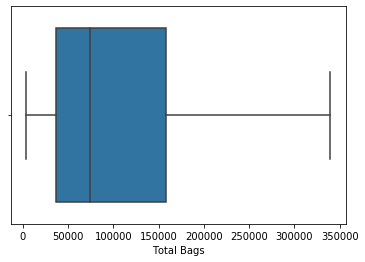

In [304]:
sns.boxplot(x1['Total Bags'])

In [305]:
len(x1['Total Bags'])

1517

In [306]:
x1.head(2)

,Total Volume,year,region,dayofweek,month,Total Bags
0,64236.62,2015,0,6,12,8696.87
1,54876.98,2015,0,6,12,9505.56


In [307]:
# 2nd iteration
print("LR ", get_score(lr,x1,y))
print("DT ", get_score(dt,x1,y))
print("SVR ", get_score(svr,x1,y))
print("KNN ", get_score(knn,x1,y))
print("RID ", get_score(rid,x1,y))
print("LS ", get_score(ls,x1,y))
print("RF ", get_score(rf,x1,y))
print("XGB ", get_score(xgb,x1,y))

LR  (0.2674419514457339, -1.7719040800447496, 0.1604372824134535)
DT  (0.996353014094859, 0.5578998373885635, 0.12299096030111104)
SVR  (0.7969349914669148, -14.058084488045589, 0.17872925212646867)
KNN  (0.6429867156292479, 0.1229343671201587, 0.13647901323145467)
RID  (0.26744182053481014, -1.7717467249474659, 0.16043161193296204)
LS  (0.2393317511506884, -1.9121654532243717, 0.16056722631459946)
RF  (0.9511500982376013, 0.6016192680669014, 0.09764712765977643)
XGB  (0.9882706659218463, 0.6603802701852185, 0.09633764228044985)


# Iteration C

In [308]:
# let's further add 4046,4225,4770
x2=x1.copy()

In [310]:
x2['4046']=original['4046']
x2['4225']=original['4225']
x2['4770']=original['4770']

In [313]:
gen_remove_outlier(x2,'4046')
gen_remove_outlier(x2,'4225')
gen_remove_outlier(x2,'4770')

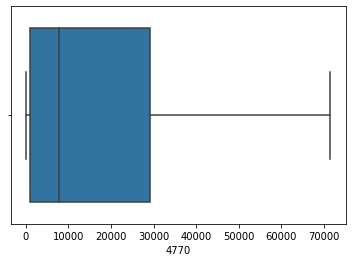

In [315]:
sns.boxplot(x2['4770'])

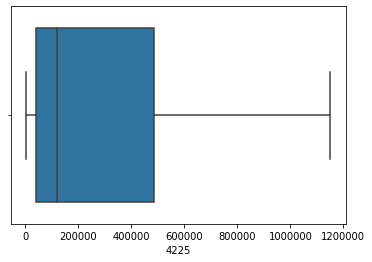

In [316]:
sns.boxplot(x2['4225'])

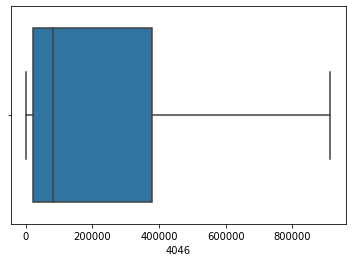

In [317]:
sns.boxplot(x2['4046'])

In [318]:
# 1St iteration
print("Model Evaluation with features Avo")
print("LR ", get_score(lr,x2,y))
print("DT ", get_score(dt,x2,y))
print("SVR ", get_score(svr,x2,y))
print("KNN ", get_score(knn,x2,y))
print("RID ", get_score(rid,x2,y))
print("LS ", get_score(ls,x2,y))
print("RF ", get_score(rf,x2,y))
print("XGB ", get_score(xgb,x2,y))

Model Evaluation with features Avo
LR  (0.39514846658732194, -0.6349893625347536, 0.14631934645865502)
DT  (0.9970856535380347, 0.5720819697446832, 0.11734776127401575)
SVR  (0.7903156516856957, -21.766422269707235, 0.18074901190585943)
KNN  (0.8125085038096442, 0.5226804644773573, 0.11228285476280077)
RID  (0.3951479208790686, -0.6349447152941567, 0.14631153258613477)
LS  (0.38053115291833794, -0.6145867263854816, 0.1457917487711737)
RF  (0.9538432912083874, 0.6395011562498883, 0.09741746536520629)
XGB  (0.9927526424293531, 0.674144814731863, 0.09496721140627962)


# Iteration D

In [319]:
# let's remove Total Bags from above
x3=x2.drop('Total Bags',axis=1)

In [320]:
# 1St iteration
print("Model Evaluation with features Avo")
print("LR ", get_score(lr,x3,y))
print("DT ", get_score(dt,x3,y))
print("SVR ", get_score(svr,x3,y))
print("KNN ", get_score(knn,x3,y))
print("RID ", get_score(rid,x3,y))
print("LS ", get_score(ls,x3,y))
print("RF ", get_score(rf,x3,y))
print("XGB ", get_score(xgb,x3,y))

Model Evaluation with features Avo
LR  (0.3810203557586417, -0.7706105997072632, 0.14703546061240938)
DT  (0.9970856535380347, 0.5714120728421459, 0.12081596971432085)
SVR  (0.7910109482596521, -22.501015317668227, 0.18092602556756684)
KNN  (0.7997612080624749, 0.42119108682353357, 0.12156134470429236)
RID  (0.3810193910370391, -0.7709446619093094, 0.14702298643495276)
LS  (0.3594784036656219, -0.7842703655714678, 0.14660044082922644)
RF  (0.9520389478035369, 0.6131982778346473, 0.09952333254770822)
XGB  (0.9919033159736246, 0.6363816342616453, 0.09987337998708531)


# Iteration E

In [324]:
# let's further drop month from x2
x4=x2.copy()
x4.drop('month',axis=1,inplace=True)

In [325]:
print("LR ", get_score(lr,x4,y))
print("DT ", get_score(dt,x4,y))
print("SVR ", get_score(svr,x4,y))
print("KNN ", get_score(knn,x4,y))
print("RID ", get_score(rid,x4,y))
print("LS ", get_score(ls,x4,y))
print("RF ", get_score(rf,x4,y))
print("XGB ", get_score(xgb,x4,y))

LR  (0.3950347460228685, -0.6417894529254564, 0.1465177530138341)
DT  (0.959258426352984, 0.6233298973157804, 0.10794202306282265)
SVR  (0.7694984612752251, -24.952525729363064, 0.17852410826767634)
KNN  (0.7967549199901799, 0.5186155020864813, 0.11271251273179829)
RID  (0.3950342041167568, -0.6417325788194992, 0.14650961741095722)
LS  (0.38053115291833794, -0.6145867263854816, 0.1457917487711737)
RF  (0.9209030958027883, 0.6487208649173993, 0.09526805131107494)
XGB  (0.9565811150075609, 0.669350409648249, 0.09462928110988074)


# Iteration F

In [326]:
# let's futher drop dayofweek from x4
x5=x4.drop('dayofweek',axis=1)

In [327]:
print("LR ", get_score(lr,x5,y))
print("DT ", get_score(dt,x5,y))
print("SVR ", get_score(svr,x5,y))
print("KNN ", get_score(knn,x5,y))
print("RID ", get_score(rid,x5,y))
print("LS ", get_score(ls,x5,y))
print("RF ", get_score(rf,x5,y))
print("XGB ", get_score(xgb,x5,y))

LR  (0.3930311987819398, -0.6384078325071998, 0.146626113307479)
DT  (0.9501382771450967, 0.6649262930065984, 0.10324063378208904)
SVR  (0.7655950659239144, -19.307526100791748, 0.17732651171987776)
KNN  (0.7906990898325004, 0.549658200400635, 0.10892102402054533)
RID  (0.39303062501974717, -0.6383459508475375, 0.14661786150233164)
LS  (0.38053115291833794, -0.6145867263854816, 0.1457917487711737)
RF  (0.915170461979286, 0.6968489140692882, 0.08915161647310281)
XGB  (0.947401881123737, 0.726176377937978, 0.08560748411151105)


In [328]:
# the score improved

In [329]:
x5.head(1)

,Total Volume,year,region,Total Bags,4046,4225,4770
0,64236.62,2015,0,8696.87,1036.74,54454.85,48.16


# Iteration g

In [331]:
# let's further add the small, large and xl bags to x5
x6=x5.copy()
x6['small']=original['Small Bags']
x6['large']=original['Large Bags']
x6['xl']=original['XLarge Bags']

In [332]:
gen_remove_outlier(x6,'small')
gen_remove_outlier(x6,'large')
gen_remove_outlier(x6,'xl')

In [333]:
print(len(x6['small']))
print(len(x6['large']))
print(len(x6['xl']))

1517
1517
1517


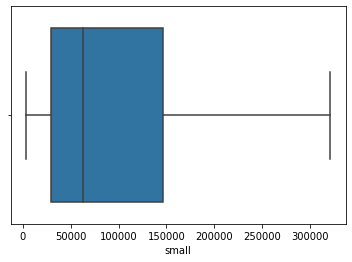

In [334]:
sns.boxplot(x6['small'])

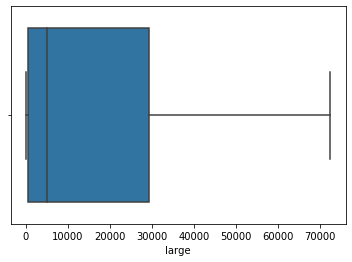

In [335]:
sns.boxplot(x6['large'])

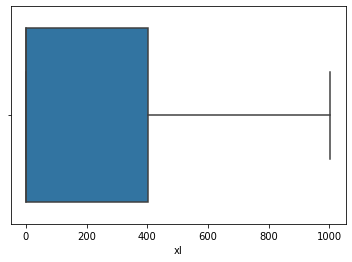

In [336]:
sns.boxplot(x6['xl'])

In [337]:
print("LR ", get_score(lr,x6,y))
print("DT ", get_score(dt,x6,y))
print("SVR ", get_score(svr,x6,y))
print("KNN ", get_score(knn,x6,y))
print("RID ", get_score(rid,x6,y))
print("LS ", get_score(ls,x6,y))
print("RF ", get_score(rf,x6,y))
print("XGB ", get_score(xgb,x6,y))

LR  (0.420413083364959, -0.46294828254097653, 0.1439741822523856)
DT  (0.9784795138150139, 0.6156154677551098, 0.11306341764836111)
SVR  (0.7838446309046275, -138.53147309925228, 0.17945542248594248)
KNN  (0.8137353131970307, 0.5737724707841824, 0.10843778230662478)
RID  (0.42041281037395817, -0.46278827039874404, 0.14396944404297823)
LS  (0.40971587255246533, -0.45234112488180744, 0.14326416093736163)
RF  (0.9383942108230066, 0.6621116597927181, 0.09186626249978504)
XGB  (0.9754102641418696, 0.6978163443175234, 0.0908195450077289)


In [338]:
# nope, results with x5 were a little better

# Iteration H

In [339]:
# let's add dayofweek in in x5
x7=x5.copy()

In [340]:
x7['dayofweek']=avo['dayofweek']

In [341]:
print("LR ", get_score(lr,x7,y))
print("DT ", get_score(dt,x7,y))
print("SVR ", get_score(svr,x7,y))
print("KNN ", get_score(knn,x7,y))
print("RID ", get_score(rid,x7,y))
print("LS ", get_score(ls,x7,y))
print("RF ", get_score(rf,x7,y))
print("XGB ", get_score(xgb,x7,y))

LR  (0.3950347460228608, -0.641789452941131, 0.14651775301406328)
DT  (0.959258426352984, 0.6147660959618869, 0.11028655892599534)
SVR  (0.7694984612752251, -24.952525729363064, 0.17852410826767634)
KNN  (0.7967549199901799, 0.5186155020864813, 0.11271251273179829)
RID  (0.3950342041167568, -0.6417325788194967, 0.14650961741095714)
LS  (0.38053115291833794, -0.6145867263854816, 0.1457917487711737)
RF  (0.9199148439236725, 0.6535017854890066, 0.09574472625542653)
XGB  (0.9565811150075609, 0.6695337914246037, 0.09464691289071409)


In [342]:
# nope, x5 was better
x5.head(1)
# these are the features we are gonna use

,Total Volume,year,region,Total Bags,4046,4225,4770
0,64236.62,2015,0,8696.87,1036.74,54454.85,48.16


# Final Result Iteration A to H

In [343]:
print("LR ", get_score(lr,x5,y))
print("DT ", get_score(dt,x5,y))
print("SVR ", get_score(svr,x5,y))
print("KNN ", get_score(knn,x5,y))
print("RID ", get_score(rid,x5,y))
print("LS ", get_score(ls,x5,y))
print("RF ", get_score(rf,x5,y))
print("XGB ", get_score(xgb,x5,y))

LR  (0.3930311987819398, -0.6384078325071998, 0.146626113307479)
DT  (0.9501382771450967, 0.6649262930065984, 0.10324063378208904)
SVR  (0.7655950659239144, -19.307526100791748, 0.17732651171987776)
KNN  (0.7906990898325004, 0.549658200400635, 0.10892102402054533)
RID  (0.39303062501974717, -0.6383459508475375, 0.14661786150233164)
LS  (0.38053115291833794, -0.6145867263854816, 0.1457917487711737)
RF  (0.915170461979286, 0.6968489140692882, 0.08915161647310282)
XGB  (0.947401881123737, 0.726176377937978, 0.08560748411151105)


In [377]:
xx=x5.copy()
x5_sk=x5.copy()

# Iteration 1

In [378]:
# let's reduce the skewness and see the results

In [379]:
x5_sk.skew()

Total Volume    1.176935
year            1.828332
region          0.288146
Total Bags      1.104160
4046            1.212500
4225            1.220883
4770            1.170573
dtype: float64

In [380]:
# x5_sk['Total Volume'].min(), x5_sk['Total Volume'].max()
x5_sk['Total Volume']=np.log(x5_sk['Total Volume'])
# skewness reduced to 0.0018

In [381]:
# x5_sk['Total Bags'].min(), x5_sk['Total Bags'].max()
x5_sk['Total Bags']=np.log1p(x5_sk['Total Bags'])
# skewness reduced to -0.24

In [382]:
# x5_sk['4046'].min(), x5_sk['4046'].max()
x5_sk['4046']=np.cbrt(x5_sk['4046'])
# skewness reduced to 0.38

In [383]:
# x5_sk['4225'].min(), x5_sk['4225'].max()
x5_sk['4225']=np.log(x5_sk['4225'])
# skewness reduced to -0.20

In [384]:
# x5_sk['4770'].min(), x5_sk['4770'].max()
x5_sk['4770']=np.cbrt(x5_sk['4770'])
# skewness reduced to 0.27

In [389]:
# compare x5 and x5_sk

In [392]:
# x5.head(7)

In [393]:
# x5_sk.head(7)

In [394]:
print("LR ", get_score(lr,x5_sk,y))
print("DT ", get_score(dt,x5_sk,y))
print("SVR ", get_score(svr,x5_sk,y))
print("KNN ", get_score(knn,x5_sk,y))
print("RID ", get_score(rid,x5_sk,y))
print("LS ", get_score(ls,x5_sk,y))
print("RF ", get_score(rf,x5_sk,y))
print("XGB ", get_score(xgb,x5_sk,y))

LR  (0.38723982060268225, -0.8162259516332271, 0.14694496294368764)
DT  (0.9501382771450967, 0.6646114167174084, 0.1031717884763642)
SVR  (0.7978362830269181, 0.09264153458389912, 0.11009942053042049)
KNN  (0.8132367650808994, 0.6325130491641415, 0.09628144052450444)
RID  (0.38723047428744717, -0.820137233287989, 0.14690802087039448)
LS  (0.28220475247812826, -4.483021457550386, 0.15329364530423414)
RF  (0.9153387775827168, 0.6937196068227467, 0.08951064437601443)
XGB  (0.947401881123737, 0.7271146606591306, 0.08555826090209552)


# Iteration 2

In [395]:
# std scale x5
x5s=std(x5)

In [396]:
print("LR ", get_score(lr,x5s,y))
print("DT ", get_score(dt,x5s,y))
print("SVR ", get_score(svr,x5s,y))
print("KNN ", get_score(knn,x5s,y))
print("RID ", get_score(rid,x5s,y))
print("LS ", get_score(ls,x5s,y))
print("RF ", get_score(rf,x5s,y))
print("XGB ", get_score(xgb,x5s,y))

LR  (0.39303119878194037, -0.6384078323788245, 0.14662611330707562)
DT  (0.9501382771450967, 0.6649262930065984, 0.10324063378208904)
SVR  (0.626245896687993, 0.212491814645278, 0.11650219505619559)
KNN  (0.8453536479428017, 0.7007410326176946, 0.08934404230130201)
RID  (0.393017756061819, -0.6467717650409799, 0.14653830110747534)
LS  (0.0, -6.68204229206591e+29, 0.1815076088495362)
RF  (0.915170461979286, 0.6968489140692882, 0.08915161647310281)
XGB  (0.947401881123737, 0.726176377937978, 0.08560748411151105)


# Iteration 3

In [397]:
xskcopy=x5_sk.copy()
x5s_sk=std(xskcopy)

In [398]:
print("LR ", get_score(lr,x5s_sk,y))
print("DT ", get_score(dt,x5s_sk,y))
print("SVR ", get_score(svr,x5s_sk,y))
print("KNN ", get_score(knn,x5s_sk,y))
print("RID ", get_score(rid,x5s_sk,y))
print("LS ", get_score(ls,x5s_sk,y))
print("RF ", get_score(rf,x5s_sk,y))
print("XGB ", get_score(xgb,x5s_sk,y))

LR  (0.3872398206026849, -0.8162259516332322, 0.14694496294368742)
DT  (0.9501382771450967, 0.6646114167174084, 0.1031717884763642)
SVR  (0.7323744158202479, 0.4971712540931935, 0.10029160526541041)
KNN  (0.8461290539417233, 0.7058453008343863, 0.08870434333399795)
RID  (0.387226594957519, -0.8233983487455425, 0.1469105778507654)
LS  (0.0, -6.68204229206591e+29, 0.1815076088495362)
RF  (0.9153387775827168, 0.6937196068227467, 0.08951064437601443)
XGB  (0.947401881123737, 0.7271146606591306, 0.08555826090209552)


In [399]:
# now, from above iterations, we conclude that:
#     RF with x5
#     XGB with x5
#     KNN with x5s_sk
#     DT x5

# DecisionTree

In [401]:
# dt with x5
# initial 0.9501382771450967, 0.6649262930065984, 0.10324063378208904

In [428]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [403]:
# let's apply BFE
# there are total 7 features
for i in range(3,7):
    print(i," ",modified_bfe(dt,x5,y,i))

3   0.15745188996046655
4   0.3196396512219468
5   0.4929226686548104
6   0.5822569550729896


In [404]:
# we'll not apply BFE

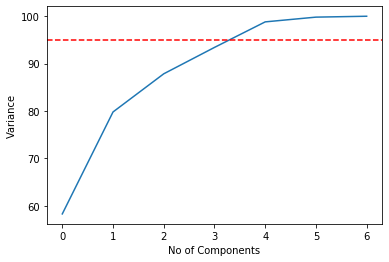

In [405]:
# let's apply PCA
# use x5s for PCA
nforpca(x5s)

In [406]:
# take n from 3 to 7
for i in range(3,7):
        print(i," ",modified_pca(dt,x5s,y,i))

3   0.6000049350379271
4   0.49298218410734695
5   0.5921030302572597
6   0.6819437646771416


In [407]:
# at n=6, results improved

In [408]:
# let's apply PCA for x5 itself
for i in range(3,7):
        print(i," ",modified_pca(dt,x5,y,i))

3   0.434308167393638
4   0.3341329128488081
5   0.5030044584743925
6   0.5855126585937689


In [441]:
# use x5s with dt in PCA
x5spca=pca(dt,x5s,6)
x5spca.head(2)

,0,1,2,3,4,5
0,-1.965822,0.501036,0.824718,-0.621705,0.386365,-0.138446
1,-1.980239,0.500013,0.823570,-0.614028,0.392126,-0.115956


In [442]:
get_score(dt,x5spca,y)

(0.9501382771450967, 0.6819437646771416, 0.09952689158181294)

In [411]:
# result improved
# but the model is overfitting
# let's tune it

In [412]:
param_dt={'splitter':['best','random'],'max_depth':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5,6,7,8],
         'max_features':['auto','sqrt','log2']}
gridcv(dt,param_dt,x5spca,y)

{'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'splitter': 'random'}

In [413]:
# took around 1 min

In [414]:
dt1=DecisionTreeRegressor(random_state=45, max_depth= 4,
 max_features= 'auto',
 min_samples_leaf= 7,
 splitter= 'random')
get_score(dt1,x5spca,y)

(0.43576578364849344, -0.32847914846921955, 0.13997000176157157)

In [415]:
# score reduced

In [416]:
param_dt1={'splitter':['best','random'],'max_depth':[1,2,3,4,5,6],'min_samples_leaf':[1,2,3,4,5,6,7,8],
         'max_features':['auto','sqrt','log2'],'min_samples_split':[2,3,4,5,6,7,8],
          'min_weight_fraction_leaf':[0.1,0.2,0.4,0.3,0.5]}
gridcv(dt,param_dt1,x5spca,y)

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [417]:
# took around 1:30 minutes

In [418]:
dt2=DecisionTreeRegressor(random_state=45, max_depth= 5,
 max_features= 'auto',
 min_samples_leaf= 1,
 splitter= 'random', min_samples_split= 2, min_weight_fraction_leaf= 0.1)
get_score(dt2,x5spca,y)

(0.275005924572459, -1.8199472857887655, 0.15385438244528782)

In [419]:
# no, the untuned model was better
# tuned model behaved worse

In [426]:
dt3=DecisionTreeRegressor(random_state=45, max_depth=9)
get_score(dt3,x5spca,y)

(0.8281857810640896, 0.5697899369343309, 0.1085249631992929)

In [427]:
# tried some manual iterations on depth
# still, untuned method is the best

In [455]:
# let's try to boost dt,x5spca,y
# grid cv tuning is very time consuming
# so, tried some manual iterations and the below combination gave the best result

In [469]:
adadt=AdaBoostRegressor(base_estimator=dt, random_state=45, n_estimators=40, learning_rate=0.01)
get_score(adadt,x5spca,y)

(0.949691415923525, 0.7363179405123164, 0.08883135509041484)

In [470]:
# cross validating dt,x5spca,y
cross(adadt,x5spca,y,8)

(-0.3536585247805111, 0.9366568064559242)

In [436]:
# dt model is not performing well

# KNeighborsRegressor

In [437]:
# KNN with x5s_sk
# initial 0.8461290539417233, 0.7058453008343863, 0.08870434333399795

In [438]:
# let's apply BFE
for i in range(3,7):
    print(i," ",modified_bfe(knn,x5s_sk,y,i))

3   0.13234902818687833
4   0.6011586165166714
5   0.6424342446492637
6   0.6539363100526158


In [439]:
# we'll not use BFE

In [440]:
# let's apply PCA
for i in range(3,7):
        print(i," ",modified_pca(knn,x5s_sk,y,i))

3   0.6325270930664264
4   0.7051336474020069
5   0.6937660122556865
6   0.7406428344129365


In [443]:
# take n=6
x5s_sk_pca=pca(knn,x5s_sk,6)
x5s_sk_pca.head(2)

,0,1,2,3,4,5
0,-3.225989,0.295770,0.463277,0.975806,0.501997,0.792735
1,-3.324133,0.299984,0.412968,0.963774,0.463184,0.634314


In [445]:
get_score(knn,x5s_sk_pca,y)

(0.85170860697016, 0.7406428344129365, 0.08335887854079461)

In [446]:
# result improved
# now let's tune knn with x5s_sk_pca

In [450]:
KNeighborsRegressor?

In [447]:
param_knn={'n_neighbors':range(2,17)}
gridcv(knn,param_knn,x5s_sk_pca,y)

{'n_neighbors': 16}

In [448]:
knn1=KNeighborsRegressor(n_jobs=-1,n_neighbors= 16)
get_score(knn1,x5s_sk_pca,y)

(0.7320129333432737, 0.4652119300344104, 0.1074975484057201)

In [449]:
# the score reduced

In [451]:
param_knn1={'n_neighbors':range(5,20),'weights':['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
           'p':[1,2]}
gridcv(knn,param_knn1,x5s_sk_pca,y)

{'algorithm': 'auto', 'n_neighbors': 19, 'p': 2, 'weights': 'uniform'}

In [452]:
# took around 1 minutes

In [453]:
knn2=KNeighborsRegressor(n_jobs=-1, algorithm= 'auto', n_neighbors= 19, p= 2, weights= 'uniform')
get_score(knn2,x5s_sk_pca,y)

(0.7067250614175247, 0.402017153238052, 0.11225320242657935)

In [478]:
# untuned model performed well
# grid cv tuning is very time consuming
# so, tried some manual iterations and the below combination gave the best result

In [481]:
# let's try to boost knn,x5s_sk_pca,y
adaknn=AdaBoostRegressor(base_estimator=knn, random_state=45, n_estimators=90, learning_rate=0.01)
get_score(adaknn,x5s_sk_pca,y)

(0.8637165596176584, 0.7591495432553834, 0.07998373189856203)

In [482]:
# each iteration took around 20 to 30 sec

In [487]:
# let's cross validate adaknn,x5s_sk_pca,y
cross(adaknn,x5s_sk_pca,y,5)

(0.2533971894239914, 0.1340463398227329)

In [488]:
# Evaluation Metrics
mse,rmse,mae=get_metrics(adaknn,x5s_sk_pca,y)
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

Mean_Squared_Error:  0.00639739736842105
Root_Mean_Squared_Error:  0.07998373189856203
Mean_Absolute_Error:  0.05675526315789472


# RandomForestRegressor

In [489]:
# RF with x5
# Initial (0.915170461979286, 0.6968489140692882, 0.08915161647310282)

In [523]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [490]:
# rf=RandomForestRegressor(n_jobs=-1,random_state=45)

In [491]:
# let's apply BFE
for i in range(3,7):
    print(i," ",modified_bfe(rf,x5,y,i))

3   0.4527206519688748
4   0.4787496530556201
5   0.6074254030587525
6   0.646406744546458


In [492]:
# we'll not use BFE

In [493]:
# let's apply PCA
# we'll use x5s
for i in range(3,7):
        print(i," ",modified_pca(rf,x5s,y,i))

3   0.6321354963817016
4   0.6301156846221179
5   0.633984183959335
6   0.6706039528986423


In [494]:
# we'll not use PCA either

In [495]:
# let's tune rf,x5,y
param_rf={'n_estimators':range(50,250,50),'max_depth':[5,6,7],'min_samples_leaf':[1,2,3,4,5],
          'min_samples_split':[2,3,4,5]}
gridcv(rf,param_rf,x5,y)

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [496]:
# took around 4 minutes

In [497]:
rf1=RandomForestRegressor(n_jobs=-1,random_state=45,max_depth= 5,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 200)
get_score(rf1,x5,y)

(0.7162277984347645, 0.36766936730812827, 0.11225769691649343)

In [499]:
# param_rf1={'n_estimators':range(50,600,50),'max_depth':[1,2,3,4,5,6,7],
#           'max_features':['auto','sqrt','log2'],'min_samples_leaf':[1,2,3,4,5],
#           'min_samples_split':[2,3,4,5,6]}
# gridcv(rf,param_rf1,x5,y)

In [501]:
# took more than 30 minutes
# we'll do grid search in steps

In [502]:
param_rf1={'max_features':['auto','sqrt','log2']}
gridcv(rf,param_rf1,x5,y)

{'max_features': 'auto'}

In [504]:
rf2=RandomForestRegressor(n_jobs=-1,random_state=45,max_features= 'auto')

In [507]:
param_rf2={'max_depth':[1,2,3,4,5,6,7],
          'min_samples_leaf':[1,2,3,4,5],
          'min_samples_split':[2,3,4,5,6,7,8]}
gridcv(rf2,param_rf2,x5,y)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [506]:
# took around 1:30 minutes

In [508]:
rf3=RandomForestRegressor(n_jobs=-1,random_state=45,max_features= 'auto',
                         max_depth= 5, min_samples_leaf= 2, min_samples_split= 6)

In [510]:
param_rf3={'n_estimators':range(400,1000,50)}
gridcv(rf3,param_rf3,x5,y)

{'n_estimators': 450}

In [511]:
# took around 1:30 minutes

In [512]:
rf4=RandomForestRegressor(n_jobs=-1,random_state=45,max_features= 'auto',
                         max_depth= 5, min_samples_leaf= 2, min_samples_split= 6,n_estimators= 450)

In [513]:
get_score(rf4,x5,y)

(0.715764586425461, 0.36268354501677336, 0.11270555701370526)

In [514]:
# the score didn't improve

In [516]:
rf5=RandomForestRegressor(n_jobs=-1,random_state=45,max_features= 'log2',
                         max_depth= 5, min_samples_leaf= 2, min_samples_split= 6,n_estimators= 450)
get_score(rf5,x5,y)

(0.7010970520875621, 0.1738864464325881, 0.11424342417981331)

In [517]:
# tried sqrt and log2 as well, the score didn't improve

In [521]:
rf6=RandomForestRegressor(n_jobs=-1,random_state=45,max_features= 'auto',
                         max_depth= 5, min_samples_leaf= 2, min_samples_split= 6,n_estimators=350)
get_score(rf6,x5,y)

(0.7150549320126558, 0.3601224478357379, 0.11283491655651487)

In [522]:
# tried n values of 50,150,250,350 etc
# the score didn't improve

In [527]:
# let's cross validate rf,x5,y
cross(rf,x5,y,5)

(0.1505454737871562, 0.3320472344587144)

In [528]:
# the tree models are not performing well

In [589]:
# let's try to boost rf with x5 using ada
# grid cv tuning is very time consuming
# so, tried some manual iterations and the below combination gave the best result
adarf=AdaBoostRegressor(base_estimator=rf, random_state=45, n_estimators=50, learning_rate=0.1)
get_score(adarf,x5,y)

(0.9232716762096836, 0.6706402123267038, 0.08910160640755903)

In [590]:
# took around 1 minutes

In [591]:
# no improvement

# XGB

In [529]:
# XGB with x5 
# initial 0.947401881123737, 0.726176377937978, 0.08560748411151105

In [530]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [531]:
# let's apply BFE
for i in range(3,7):
    print(i," ",modified_bfe(xgb,x5,y,i))

3   0.28925895302409355
4   0.517378528684704
5   0.5903484452441484
6   0.7036411814665811


In [532]:
# we won't use BFE

In [533]:
# let's apply PCA
for i in range(3,7):
        print(i," ",modified_pca(xgb,x5s,y,i))

3   0.6227157648797127
4   0.6161773486419835
5   0.6908581988117459
6   0.698827132545273


In [534]:
# the score didn't improve

In [536]:
# let's tune xgb,x5,y
param_xgb={'max_depth':[2,3,4,5,6,7,8],'learning_rate':[0.05,0.1,0.20,0.5],
        'booster':['gbtree','gblinear','dart'],
        'min_child_weight':[1,2,3,4]}
gridcv(xgb,param_xgb,x5,y)

{'booster': 'gbtree',
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 4}

In [537]:
# took around 4 minutes

In [540]:
xgb1=XGBRegressor(n_jobs=-1,random_state=45,max_depth=3,booster='gbtree')

In [541]:
param_xgb1={'learning_rate':[0.01,0.02,0.04,0.05,0.1],
        'min_child_weight':[1,2,3,4,5,6]}
gridcv(xgb1,param_xgb1,x5,y)

{'learning_rate': 0.04, 'min_child_weight': 2}

In [542]:
xgb2=XGBRegressor(n_jobs=-1,random_state=45,max_depth=3,booster='gbtree',learning_rate= 0.04, min_child_weight= 4)

In [544]:
param_xgb2={'n_estimators':range(50,200,20)}
gridcv(xgb2,param_xgb2,x5,y)

{'n_estimators': 110}

In [545]:
xgb3=XGBRegressor(n_jobs=-1,random_state=45,max_depth=3,booster='gbtree',learning_rate= 0.04, min_child_weight= 4,
                 n_estimators= 110)

In [546]:
get_score(xgb3,x5,y)

(0.707873698799065, 0.3035379690280975, 0.11324181964401973)

In [547]:
# the score didn't improve

In [568]:
xgb4=XGBRegressor(n_jobs=-1,random_state=45,max_depth=3,booster='gbtree',learning_rate= 0.04, min_child_weight= 2,
                 n_estimators=3000)
get_score(xgb4,x5,y)

(0.9414506332422199, 0.6674452031095575, 0.09277559421191117)

In [569]:
# the model did not improved

In [574]:
# let's cross validate xgb4,x5,y
cross(xgb4,x5,y,5)

(0.1711855865956677, 0.16923700842845735)

In [571]:
# took around 1/2 minutes

In [575]:
# tree models are not performing well

In [577]:
# let's try to boost xgb using ada
xgb5=XGBRegressor(n_jobs=-1,random_state=45,max_depth=3,booster='gbtree',learning_rate= 0.04, min_child_weight= 2,
                 n_estimators=1500)
get_score(xgb5,x5,y)

(0.9207464393175193, 0.6569749628469523, 0.09287938302923802)

In [582]:
# let's try to boost xgb5 using ada
# grid cv tuning is very time consuming
# so, tried some manual iterations and the below combination gave the best result
adaxgb=AdaBoostRegressor(base_estimator=xgb5, random_state=45, n_estimators=100, learning_rate=0.01)
get_score(adaxgb,x5,y)

(0.9267969171324385, 0.6459683665323845, 0.09269707757055577)

In [583]:
# took around 2:30 minutes

In [584]:
# the score is not getting improved

# Saving the Model

In [592]:
# the best model is adaknn,x5s_sk_pca,y

In [593]:
fit(adaknn,x5s_sk_pca,y)

In [594]:
pred=get_pred(adaknn,x5s_sk_pca,y)
prediction=pd.DataFrame(pred)
prediction.to_csv('reg_pred_avocado.csv')

In [595]:
import joblib
joblib.dump(adaknn,'adaknn_reg_avocado.pkl')

['adaknn_reg_avocado.pkl']

# Classification

In [596]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [753]:
# Now, let's define some functions to reuse them
def fitc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    
def get_scorec(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=accuracy_score(pred,y_test)
    return train_score,test_score

def get_predc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

def get_metricsc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    conf=confusion_matrix(pred,y_test)
    clas=classification_report(pred,y_test)
    return acc,conf,clas

from sklearn.model_selection import GridSearchCV
def gridcvc(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=5,scoring='accuracy')
    gkb.fit(x,y)
    return gkb.best_params_


from sklearn.model_selection import RandomizedSearchCV
def randomcvc(m,p,x,y):
    from sklearn.model_selection import RandomizedSearchCV
    gkb=RandomizedSearchCV(estimator=m,param_distributions=p,
                          cv=5,n_iter=100,scoring='accuracy',
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)
    gkb.fit(x,y)
    return gkb.best_params_

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
def bfec(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    return xbfe

from sklearn.decomposition import PCA
def nforpcac(x):
    pca=PCA().fit(x)
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
    plt.xlabel('No of Components')
    plt.ylabel('Variance')
    plt.axhline(y=95, color='r', linestyle='--')
    plt.show()
    
def pcac(m,x,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    return xpca

def crossc(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1)
    return (score.mean(), score.std())

from sklearn.preprocessing import StandardScaler
def stdc(x):
    scx=StandardScaler()
    xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)
    return xs

def modified_bfec(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xbfe,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=accuracy_score(pred,y_test)
    return test_score

def modified_pcac(m,x,y,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    x_train, x_test, y_train, y_test=train_test_split(xpca,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=accuracy_score(pred,y_test)
    return test_score

In [598]:
# now, we've avo and original
avo.head()

,AveragePrice,Total Volume,year,region,dayofweek,month
0,1.33,64236.62,2015,0,6,12
1,1.35,54876.98,2015,0,6,12
2,0.93,118220.22,2015,0,6,12
3,1.08,78992.15,2015,0,4,6
4,1.28,51039.60,2015,0,6,11


In [599]:
original.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [600]:
# we'll run different iterations to choose the right features

In [601]:
# seperate xc and yc
xc=avo.drop('region',axis=1)
# yc=avo['region']

In [602]:
# first add 4046,4225,4770,Total Bags, small,large,xl bags to xc
# then remove their outliers

In [603]:
xc['4046']=original['4046']
xc['4225']=original['4225']
xc['4770']=original['4770']
xc['tbags']=original['Total Bags']
xc['small']=original['Small Bags']
xc['large']=original['Large Bags']
xc['xl']=original['XLarge Bags']

In [604]:
# remove outliers from all
gen_remove_outlier(xc,'4046')
gen_remove_outlier(xc,'4225')
gen_remove_outlier(xc,'4770')
gen_remove_outlier(xc,'tbags')
gen_remove_outlier(xc,'small')
gen_remove_outlier(xc,'large')
gen_remove_outlier(xc,'xl')

In [605]:
# create a copy of xc
xccopy=xc.copy()

In [606]:
dtc=DecisionTreeClassifier(random_state=45)
svc=SVC()
knnc=KNeighborsClassifier(n_jobs=-1)
rfc=RandomForestClassifier(n_jobs=-1,random_state=45)
xgbc=XGBClassifier(n_jobs=-1,random_state=45)
adac=AdaBoostClassifier(random_state=45)
gnb=GaussianNB()
mnb=MultinomialNB()

In [609]:
# visualizing class y
y=original['region']
y.value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
SouthCarolina          24
Denver                 24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
MiamiFtLauderdale      17
DallasFtWorth          17
Roanoke     

In [610]:
# visualizing xc
xc.head()

,AveragePrice,Total Volume,year,dayofweek,month,4046,4225,4770,tbags,small,large,xl
0,1.33,64236.62,2015,6,12,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,2015,6,12,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,2015,6,12,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,2015,4,6,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,2015,6,11,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0


# Iteration A

In [613]:
# with all the features
print("DT ", get_scorec(dtc,xc,y))
print("SVC ", get_scorec(svc,xc,y))
print("KNN ", get_scorec(knnc,xc,y))
print("GNB ", get_scorec(gnb,xc,y))
print("MNB ", get_scorec(mnb,xc,y))
print("RF ", get_scorec(rfc,xc,y))
print("XGB ", get_scorec(xgbc,xc,y))

DT  (1.0, 0.881578947368421)
SVC  (0.9894459102902374, 0.08947368421052632)
KNN  (0.86103781882146, 0.8210526315789474)
GNB  (0.8847845206684257, 0.8631578947368421)
MNB  (0.7247141600703606, 0.7526315789473684)
RF  (0.9973614775725593, 0.9315789473684211)
XGB  (1.0, 0.9184210526315789)


# Iteration B

In [618]:
# let's remove dayofweek and month from xc
xc1=xc.copy()
xc1.drop(['dayofweek','month'],axis=1,inplace=True)

In [619]:
xc1.head(1)

,AveragePrice,Total Volume,year,4046,4225,4770,tbags,small,large,xl
0,1.33,64236.62,2015,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0


In [620]:
print("DT ", get_scorec(dtc,xc1,y))
print("SVC ", get_scorec(svc,xc1,y))
print("KNN ", get_scorec(knnc,xc1,y))
print("GNB ", get_scorec(gnb,xc1,y))
print("MNB ", get_scorec(mnb,xc1,y))
print("RF ", get_scorec(rfc,xc1,y))
print("XGB ", get_scorec(xgbc,xc1,y))

DT  (0.9973614775725593, 0.8868421052631579)
SVC  (0.9885664028144239, 0.09736842105263158)
KNN  (0.8654353562005277, 0.8289473684210527)
GNB  (0.8839050131926122, 0.8631578947368421)
MNB  (0.723834652594547, 0.75)
RF  (0.9956024626209323, 0.9473684210526315)
XGB  (0.9973614775725593, 0.9263157894736842)


In [621]:
# the score improved
# also, the models now overfit less

# Iteration C

In [622]:
# further remove ['small','large','xl'] from xc1
xc2=xc1.copy()
xc2.drop(['small','large','xl'],axis=1,inplace=True)

In [623]:
xc2.head(1)

,AveragePrice,Total Volume,year,4046,4225,4770,tbags
0,1.33,64236.62,2015,1036.74,54454.85,48.16,8696.87


In [624]:
print("DT ", get_scorec(dtc,xc2,y))
print("SVC ", get_scorec(svc,xc2,y))
print("KNN ", get_scorec(knnc,xc2,y))
print("GNB ", get_scorec(gnb,xc2,y))
print("MNB ", get_scorec(mnb,xc2,y))
print("RF ", get_scorec(rfc,xc2,y))
print("XGB ", get_scorec(xgbc,xc2,y))

DT  (0.9850483729111698, 0.8657894736842106)
SVC  (0.9569041336851363, 0.10263157894736842)
KNN  (0.8434476693051891, 0.8)
GNB  (0.8214599824098505, 0.8184210526315789)
MNB  (0.6561125769569042, 0.7026315789473684)
RF  (0.9832893579595426, 0.9184210526315789)
XGB  (0.9850483729111698, 0.8842105263157894)


In [625]:
# the score reduced

# Iteration D

In [626]:
# lets removed tbags instead of small, large and xl
xc3=xc1.copy()
xc3.drop(['tbags'],axis=1,inplace=True)

In [627]:
xc3.head(1)

,AveragePrice,Total Volume,year,4046,4225,4770,small,large,xl
0,1.33,64236.62,2015,1036.74,54454.85,48.16,8603.62,93.25,0.0


In [628]:
print("DT ", get_scorec(dtc,xc3,y))
print("SVC ", get_scorec(svc,xc3,y))
print("KNN ", get_scorec(knnc,xc3,y))
print("GNB ", get_scorec(gnb,xc3,y))
print("MNB ", get_scorec(mnb,xc3,y))
print("RF ", get_scorec(rfc,xc3,y))
print("XGB ", get_scorec(xgbc,xc3,y))

DT  (0.9973614775725593, 0.8868421052631579)
SVC  (0.9885664028144239, 0.09736842105263158)
KNN  (0.8654353562005277, 0.8236842105263158)
GNB  (0.8944591029023746, 0.8578947368421053)
MNB  (0.7379067722075637, 0.7736842105263158)
RF  (0.9973614775725593, 0.9368421052631579)
XGB  (0.9973614775725593, 0.9157894736842105)


In [629]:
# only rf and xgb reduced a little

# Iteration E

In [630]:
# let's remove 4046,4225,4770 from xc1
xc4=xc1.copy()
xc4.drop(['4046','4225','4770'],axis=1,inplace=True)

In [631]:
xc4.head(1)

,AveragePrice,Total Volume,year,tbags,small,large,xl
0,1.33,64236.62,2015,8696.87,8603.62,93.25,0.0


In [632]:
# with all the features
print("DT ", get_scorec(dtc,xc4,y))
print("SVC ", get_scorec(svc,xc4,y))
print("KNN ", get_scorec(knnc,xc4,y))
print("GNB ", get_scorec(gnb,xc4,y))
print("MNB ", get_scorec(mnb,xc4,y))
print("RF ", get_scorec(rfc,xc4,y))
print("XGB ", get_scorec(xgbc,xc4,y))

DT  (0.9947229551451188, 0.8131578947368421)
SVC  (0.969217238346526, 0.11315789473684211)
KNN  (0.6983289357959542, 0.6236842105263158)
GNB  (0.6191732629727352, 0.618421052631579)
MNB  (0.4467897977132806, 0.4868421052631579)
RF  (0.9885664028144239, 0.8026315789473685)
XGB  (0.9938434476693052, 0.8394736842105263)


In [633]:
# the score reduced

# Iteration F

In [663]:
# lets remove 'Total Volume' from xc1
xc5=xc1.copy()
xc5.drop(['Total Volume'],axis=1,inplace=True)

In [664]:
xc5.head(1)

,AveragePrice,year,4046,4225,4770,tbags,small,large,xl
0,1.33,2015,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0


In [665]:
print("DT ", get_scorec(dtc,xc5,y))
print("SVC ", get_scorec(svc,xc5,y))
print("KNN ", get_scorec(knnc,xc5,y))
print("GNB ", get_scorec(gnb,xc5,y))
print("MNB ", get_scorec(mnb,xc5,y))
print("RF ", get_scorec(rfc,xc5,y))
print("XGB ", get_scorec(xgbc,xc5,y))

DT  (0.9973614775725593, 0.9026315789473685)
SVC  (0.9885664028144239, 0.09736842105263158)
KNN  (0.8883025505716798, 0.8578947368421053)
GNB  (0.8847845206684257, 0.868421052631579)
MNB  (0.7211961301671064, 0.75)
RF  (0.9956024626209323, 0.9552631578947368)
XGB  (0.9973614775725593, 0.9210526315789473)


In [666]:
# the score improved

In [667]:
# add 'dayofweek' and 'month' to xc5
xc55=xc5.copy()
xc55['dayofweek']=xc['dayofweek']
xc55['month']=xc['month']

In [668]:
xc55.head(1)

,AveragePrice,year,4046,4225,4770,tbags,small,large,xl,dayofweek,month
0,1.33,2015,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,6,12


In [669]:
print("DT ", get_scorec(dtc,xc55,y))
print("SVC ", get_scorec(svc,xc55,y))
print("KNN ", get_scorec(knnc,xc55,y))
print("GNB ", get_scorec(gnb,xc55,y))
print("MNB ", get_scorec(mnb,xc55,y))
print("RF ", get_scorec(rfc,xc55,y))
print("XGB ", get_scorec(xgbc,xc55,y))

DT  (1.0, 0.8868421052631579)
SVC  (0.990325417766051, 0.09210526315789473)
KNN  (0.8830255057167986, 0.85)
GNB  (0.8839050131926122, 0.868421052631579)
MNB  (0.7211961301671064, 0.75)
RF  (0.9991204925241864, 0.9552631578947368)
XGB  (1.0, 0.9157894736842105)


# Iteration G

In [643]:
# now, let's only keep avg price, year, 4046, 4225, 4770, small,large,xl, dayofweek and month
xc6=xc.copy()
xc6.head(1)

,AveragePrice,Total Volume,year,dayofweek,month,4046,4225,4770,tbags,small,large,xl
0,1.33,64236.62,2015,6,12,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0


In [644]:
xc6.drop(['Total Volume', 'tbags'],axis=1,inplace=True)

In [645]:
# with all the features
print("DT ", get_scorec(dtc,xc6,y))
print("SVC ", get_scorec(svc,xc6,y))
print("KNN ", get_scorec(knnc,xc6,y))
print("GNB ", get_scorec(gnb,xc6,y))
print("MNB ", get_scorec(mnb,xc6,y))
print("RF ", get_scorec(rfc,xc6,y))
print("XGB ", get_scorec(xgbc,xc6,y))

DT  (1.0, 0.8657894736842106)
SVC  (0.9912049252418645, 0.08947368421052632)
KNN  (0.8786279683377308, 0.8289473684210527)
GNB  (0.8962181178540017, 0.8736842105263158)
MNB  (0.7291116974494283, 0.7631578947368421)
RF  (1.0, 0.9394736842105263)
XGB  (1.0, 0.9236842105263158)


In [646]:
xc6.drop(['dayofweek', 'month'],axis=1,inplace=True)

In [647]:
print("DT ", get_scorec(dtc,xc6,y))
print("SVC ", get_scorec(svc,xc6,y))
print("KNN ", get_scorec(knnc,xc6,y))
print("GNB ", get_scorec(gnb,xc6,y))
print("MNB ", get_scorec(mnb,xc6,y))
print("RF ", get_scorec(rfc,xc6,y))
print("XGB ", get_scorec(xgbc,xc6,y))

DT  (0.9973614775725593, 0.8763157894736842)
SVC  (0.9885664028144239, 0.09736842105263158)
KNN  (0.8839050131926122, 0.8368421052631579)
GNB  (0.8962181178540017, 0.8736842105263158)
MNB  (0.7291116974494283, 0.7631578947368421)
RF  (0.9973614775725593, 0.9368421052631579)
XGB  (0.9973614775725593, 0.9157894736842105)


# Final Result Iteration A to G

In [651]:
# conclusion: use xc5

# Iteration 1

In [670]:
print("DT ", get_scorec(dtc,xc5,y))
print("SVC ", get_scorec(svc,xc5,y))
print("KNN ", get_scorec(knnc,xc5,y))
print("GNB ", get_scorec(gnb,xc5,y))
print("MNB ", get_scorec(mnb,xc5,y))
print("RF ", get_scorec(rfc,xc5,y))
print("XGB ", get_scorec(xgbc,xc5,y))

DT  (0.9973614775725593, 0.9026315789473685)
SVC  (0.9885664028144239, 0.09736842105263158)
KNN  (0.8883025505716798, 0.8578947368421053)
GNB  (0.8847845206684257, 0.868421052631579)
MNB  (0.7211961301671064, 0.75)
RF  (0.9956024626209323, 0.9552631578947368)
XGB  (0.9973614775725593, 0.9210526315789473)


# Iteration 2

In [653]:
# let's do std scaling
xc5s=stdc(xc5)

In [654]:
xc5s.head()

,AveragePrice,year,4046,4225,4770,tbags,small,large,xl
0,1.405623,-0.441008,-0.772696,-0.689761,-0.788989,-0.987792,-0.918554,-0.737373,-0.622958
1,1.516022,-0.441008,-0.773816,-0.714275,-0.788595,-0.980578,-0.911000,-0.737208,-0.622958
2,-0.802358,-0.441008,-0.773444,-0.553165,-0.785797,-0.992711,-0.923825,-0.736989,-0.622958
3,0.025635,-0.441008,-0.772402,-0.646002,-0.788042,-1.013532,-0.946030,-0.735799,-0.622958
4,1.129625,-0.441008,-0.772991,-0.716274,-0.787918,-1.010207,-0.943130,-0.733314,-0.622958


In [656]:
print("DT ", get_scorec(dtc,xc5s,y))
print("SVC ", get_scorec(svc,xc5s,y))
print("KNN ", get_scorec(knnc,xc5s,y))
print("GNB ", get_scorec(gnb,xc5s,y))
# print("MNB ", get_scorec(mnb,xc5s,y))
print("RF ", get_scorec(rfc,xc5s,y))
print("XGB ", get_scorec(xgbc,xc5s,y))

DT  (0.9973614775725593, 0.9026315789473685)
SVC  (0.6904133685136323, 0.6921052631578948)
KNN  (0.9023746701846965, 0.8578947368421053)
GNB  (0.8355321020228672, 0.8394736842105263)
RF  (0.9956024626209323, 0.9552631578947368)
XGB  (0.9973614775725593, 0.9210526315789473)


# Iteration 3

In [671]:
# let's try skewness removal
xc5_sk=xc5.copy()
xc5_sk.skew()

AveragePrice   -0.106022
year            1.828332
4046            1.212500
4225            1.220883
4770            1.170573
tbags           1.104160
small           1.166098
large           1.230728
xl              1.178417
dtype: float64

In [672]:
# xc5_sk['Total Bags'].min(), xc5_sk['Total Bags'].max()
xc5_sk['tbags']=np.log1p(xc5_sk['tbags'])
# skewness reduced to -0.24

In [673]:
# xc5_sk['4046'].min(), xc5_sk['4046'].max()
xc5_sk['4046']=np.cbrt(xc5_sk['4046'])
# skewness reduced to 0.38

In [674]:
# xc5_sk['4225'].min(), xc5_sk['4225'].max()
xc5_sk['4225']=np.log(xc5_sk['4225'])
# skewness reduced to -0.20

In [675]:
# xc5_sk['4770'].min(), xc5_sk['4770'].max()
xc5_sk['4770']=np.cbrt(xc5_sk['4770'])
# skewness reduced to 0.27

In [679]:
# xc5_sk['small'].min(), xc5_sk['small'].max()
xc5_sk['small']=np.log(xc5_sk['small'])
# skewness reduced to -0.1

In [682]:
# xc5_sk['large'].min(), xc5_sk['large'].max()
xc5_sk['large']=np.cbrt(xc5_sk['large'])
# skewness reduced to 0.30

In [693]:
# xc5_sk['xl'].min(), xc5_sk['xl'].max()
xc5_sk['xl']=np.power(xc5_sk['xl'],1/10)
# skewness reduced to 0.25

In [694]:
xc5_sk.skew()

AveragePrice   -0.106022
year            1.828332
4046            0.381440
4225           -0.202211
4770            0.273031
tbags          -0.244284
small          -0.100385
large           0.305380
xl              0.257399
dtype: float64

In [699]:
#  let's compare xc5_sk and xc5
# xc5_sk.head(10)

In [700]:
# xc5.head()

In [701]:
print("DT ", get_scorec(dtc,xc5_sk,y))
print("SVC ", get_scorec(svc,xc5_sk,y))
print("KNN ", get_scorec(knnc,xc5_sk,y))
print("GNB ", get_scorec(gnb,xc5_sk,y))
print("MNB ", get_scorec(mnb,xc5_sk,y))
print("RF ", get_scorec(rfc,xc5_sk,y))
print("XGB ", get_scorec(xgbc,xc5_sk,y))

DT  (0.9973614775725593, 0.9)
SVC  (0.961301671064204, 0.8210526315789474)
KNN  (0.9199648197009674, 0.8842105263157894)
GNB  (0.9041336851363236, 0.8973684210526316)
MNB  (0.6939313984168866, 0.6631578947368421)
RF  (0.9956024626209323, 0.9552631578947368)
XGB  (0.9973614775725593, 0.9210526315789473)


# Iteration 4

In [702]:
# now, let's std scale the xc5_sk data

In [703]:
xc5s_sk=stdc(xc5_sk)

In [706]:
# xc5_sk.head()

In [707]:
# xc5s_sk.head()

In [709]:
print("DT ", get_scorec(dtc,xc5s_sk,y))
print("SVC ", get_scorec(svc,xc5s_sk,y))
print("KNN ", get_scorec(knnc,xc5s_sk,y))
print("GNB ", get_scorec(gnb,xc5s_sk,y))
# print("MNB ", get_scorec(mnb,xc5s_sk,y))
print("RF ", get_scorec(rfc,xc5s_sk,y))
print("XGB ", get_scorec(xgbc,xc5s_sk,y))

DT  (0.9973614775725593, 0.9)
SVC  (0.9129287598944591, 0.8868421052631579)
KNN  (0.9463500439753738, 0.9289473684210526)
GNB  (0.8839050131926122, 0.8710526315789474)
RF  (0.9956024626209323, 0.9552631578947368)
XGB  (0.9973614775725593, 0.9210526315789473)


# Final Result Iteration 1 to 4

In [711]:
# top performing models are:
#     DT with xc5 0.9973614775725593, 0.9026315789473685
#     KNN with xc5s_sk 0.9463500439753738, 0.9289473684210526
#     RF with xc5  0.9956024626209323, 0.9552631578947368
#     XGB with xc5 0.9973614775725593, 0.9210526315789473

# DecisionTree

In [720]:
# dtc=DecisionTreeClassifier(random_state=45)

In [712]:
#     DT with xc5 0.9973614775725593, 0.9026315789473685

In [713]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [715]:
# let's apply BFE
# there are 9 features
for i in range(4,9):
    print(i," ",modified_bfec(dtc,xc5,y,i))

4   0.8131578947368421
5   0.8315789473684211
6   0.8631578947368421
7   0.8763157894736842
8   0.8763157894736842


In [716]:
# score reduced, we won't use BFE

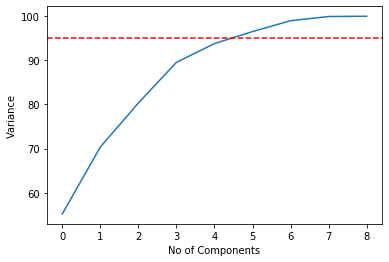

In [717]:
# let's apply PCA with xc5s
nforpcac(xc5s)

In [718]:
# take n from 4 to 9
for i in range(4,9):
        print(i," ",modified_pcac(dtc,xc5s,y,i))

4   0.6657894736842105
5   0.718421052631579
6   0.75
7   0.7605263157894737
8   0.7842105263157895


In [719]:
# the score reduced
# we won't use PCA

In [721]:
DecisionTreeClassifier?

In [722]:
# let's tune dtc with xc5
param_dtc={'criterion':['gini', 'entropy'], 'max_depth':range(2,8),'splitter':['best','random'],
          'min_samples_split':[2,3,4,5,6,7],'min_samples_leaf':[1,2,3,4,5],
          'min_weight_fraction_leaf':[0,0.1,0.2,0.3,0.4,0.5],'max_features':['auto','sqrt','log2']}
gridcvc(dtc,param_dtc,xc5,y)

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0,
 'splitter': 'best'}

In [723]:
# took around 4 minutes

In [724]:
dtc1=DecisionTreeClassifier(random_state=45, criterion= 'entropy',
 max_depth= 7,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0,
 splitter= 'best')
get_scorec(dtc1,xc5,y)

(0.8962181178540017, 0.8157894736842105)

In [725]:
# the score reduced

In [729]:
dtc2=DecisionTreeClassifier(random_state=45, criterion= 'entropy',
 max_depth= 8,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0,
 splitter= 'best')
get_scorec(dtc2,xc5,y)

(0.9683377308707124, 0.8736842105263158)

In [730]:
param_dtc2={'criterion':['gini', 'entropy'], 'max_depth':range(5,11),'splitter':['best','random'],
          'min_samples_split':[2,3,4,5,6,7],'min_samples_leaf':[1,2,3,4,5],
          'min_weight_fraction_leaf':[0,0.1,0.2,0.3,0.4,0.5],'max_features':['auto','sqrt','log2']}
gridcvc(dtc,param_dtc2,xc5,y)

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0,
 'splitter': 'best'}

In [731]:
# took around 4 minutes

In [732]:
dtc3=DecisionTreeClassifier(random_state=45, criterion= 'entropy',
 max_depth= 10,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 4,
 min_weight_fraction_leaf= 0,
 splitter= 'best')
get_scorec(dtc3,xc5,y)

(0.9797713280562885, 0.8368421052631579)

In [733]:
# the score is less

In [734]:
# we'll use untuned dtc

In [751]:
# grid cv tuning is very time consuming
# so, trying some manual iterations and the below combination gave the best result

In [749]:
# let's try to boost dtc,xc5 with Ada
adadtc=AdaBoostClassifier(base_estimator=dtc, learning_rate= 0.05, n_estimators=40, random_state=45)
get_scorec(adadtc,xc5,y)

(0.9973614775725593, 0.9052631578947369)

In [750]:
# this is the best
# the score is less than dtc

In [758]:
# let's cross validate dtc,xc5,y
crossc(dtc,xc5,y,10)

(0.8631500341368327, 0.05154585719267595)

In [759]:
# no over fitting or under fitting

In [760]:
# Evaluation metrics
acc, conf, clas=get_metricsc(dtc,xc5,y)
print(acc)
print(' ')
print(conf)
print(' ')
print(clas)

0.9026315789473685
 
[[15  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  2  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  6]]
 
                     precision    recall  f1-score   support

             Albany       0.88      0.94      0.91        16
            Atlanta       0.93      0.93      0.93        14
BaltimoreWashington       0.88      1.00      0.93        14
              Boise       0.94      0.94      0.94        16
             Boston       0.94      1.00      0.97        15
   BuffaloRochester       1.00      1.00      1.00        13
         California       0.95      1.00      0.97        18
          Charlotte       0.75      1.00      0.86         6
            Chicago       1.00      1.00      1.00         6
           Columbus       0.92      1.00      0.96        11
      DallasFtWorth       0.50      1.00      0.67         2
             Denver       1.00      1.00      1.00         6
            Detroit       1

# KNN

In [763]:
# knnc=KNeighborsClassifier(n_jobs=-1)

In [761]:
# KNN with xc5s_sk 0.9463500439753738, 0.9289473684210526

In [762]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [764]:
# let's apply BFE
for i in range(4,9):
    print(i," ",modified_bfec(knnc,xc5s_sk,y,i))

4   0.8552631578947368
5   0.8894736842105263
6   0.9263157894736842
7   0.9421052631578948
8   0.9421052631578948


In [765]:
# at k=7, score improved

In [766]:
xc5s_sk_bfe1=bfec(knnc,xc5s_sk,y,7)
xc5s_sk_bfe1.head(1)

,AveragePrice,year,4046,4225,4770,small,large
0,1.405623,-0.441008,-1.368477,-0.565797,-1.368109,-1.815684,-1.09987


In [767]:
get_scorec(knnc,xc5s_sk_bfe1,y)

(0.9507475813544415, 0.9421052631578948)

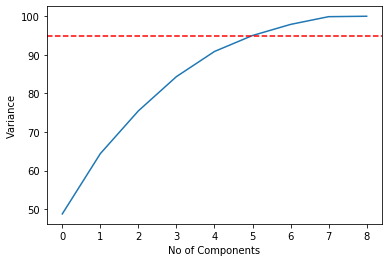

In [768]:
# let's apply PCA
nforpcac(xc5s_sk)

In [769]:
# n from 5 to 9
for i in range(5,9):
        print(i," ",modified_pcac(knnc,xc5s_sk,y,i))

5   0.8736842105263158
6   0.8921052631578947
7   0.9184210526315789
8   0.9289473684210526


In [770]:
# we'll not use PCA
# BFE is better

In [771]:
# now, let's tune knnc,xc5s_sk_bfe1,y

In [776]:
KNeighborsClassifier?

In [773]:
param_knnc={'n_neighbors':range(2,20)}
gridcvc(knnc,param_knnc,xc5s_sk_bfe1,y)

{'n_neighbors': 3}

In [774]:
knnc1=KNeighborsClassifier(n_jobs=-1, n_neighbors= 3)
get_scorec(knnc1,xc5s_sk_bfe1,y)

(0.961301671064204, 0.9526315789473684)

In [775]:
# the score improved

In [777]:
param_knnc2={'n_neighbors':[2,3,4,5,6],'weights':['distance','uniform'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p':[1,2]}
gridcvc(knnc,param_knnc2,xc5s_sk_bfe1,y)

{'algorithm': 'brute', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [778]:
# took around 1/2 minutes

In [779]:
knnc2=KNeighborsClassifier(n_jobs=-1, n_neighbors= 3, algorithm= 'brute', p= 1, weights= 'distance')
get_scorec(knnc2,xc5s_sk_bfe1,y)

(0.9876868953386104, 0.9578947368421052)

In [780]:
# the score again improved

In [781]:
# let's boost knnc2,xc5s_sk_bfe1,y

In [782]:
# grid cv tuning is very time consuming
# so, trying some manual iterations and the below combination gave the best result

In [785]:
# we can't use knn with ada

In [788]:
# cross validate knnc2,xc5s_sk_bfe1,y
crossc(knnc2,xc5s_sk_bfe1,y)

(0.9104626852520841, 0.03376300292095789)

In [789]:
# no under fitting or over fitting

In [790]:
# Evaluation metrics
acc, conf, clas=get_metricsc(knnc2,xc5s_sk_bfe1,y)
print(acc)
print(' ')
print(conf)
print(' ')
print(clas)

0.9578947368421052
 
[[17  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  4  0]
 [ 0  0  0 ...  4  4  0]
 [ 0  0  0 ...  0  0  7]]
 
                     precision    recall  f1-score   support

             Albany       1.00      1.00      1.00        17
            Atlanta       1.00      1.00      1.00        14
BaltimoreWashington       1.00      1.00      1.00        16
              Boise       1.00      1.00      1.00        16
             Boston       1.00      1.00      1.00        16
   BuffaloRochester       1.00      1.00      1.00        13
         California       0.95      1.00      0.97        18
          Charlotte       1.00      1.00      1.00         8
            Chicago       1.00      1.00      1.00         6
           Columbus       1.00      1.00      1.00        12
      DallasFtWorth       1.00      1.00      1.00         4
             Denver       1.00      1.00      1.00         6
            Detroit       1

# RandomForest

In [793]:
# rfc=RandomForestClassifier(n_jobs=-1,random_state=45)

In [791]:
# RF with xc5  0.9956024626209323, 0.9552631578947368

In [792]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [794]:
# let's apply BFE
for i in range(4,9):
    print(i," ",modified_bfec(rfc,xc5,y,i))

4   0.8578947368421053
5   0.8921052631578947
6   0.9289473684210526
7   0.9210526315789473
8   0.9368421052631579


In [795]:
# we won't use BFE

In [796]:
# lets apply PCA
# take n from 4 to 9
for i in range(4,9):
        print(i," ",modified_pcac(rfc,xc5s,y,i))

4   0.7289473684210527
5   0.7736842105263158
6   0.8289473684210527
7   0.8315789473684211
8   0.8631578947368421


In [797]:
# we won't use PCA either

In [798]:
# let's tune rfc,xc5

In [799]:
RandomForestClassifier?

In [803]:
param_rfc={'max_features':['auto','sqrt','log2'],'criterion':['gini','entropy']}
gridcvc(rfc,param_rfc,xc5,y)

{'criterion': 'entropy', 'max_features': 'auto'}

In [804]:
rfc1=RandomForestClassifier(n_jobs=-1,random_state=45,max_features= 'auto',criterion= 'entropy')

In [806]:
param_rfc1={'max_depth':range(2,8),'min_samples_split':[3,4,5,6,7,8],
          'min_samples_leaf':[1,2,3,4,5,6,7],'min_weight_fraction_leaf':[0.0,0.1,0.2,0.4,0.5]}
gridcvc(rfc1,param_rfc1,xc5,y)

{'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0}

In [807]:
# took around 7 minutes

In [809]:
rfc2=RandomForestClassifier(n_jobs=-1,random_state=45,max_features= 'auto',criterion= 'entropy',
                          max_depth= 7,
 min_samples_leaf= 1,
 min_samples_split= 6,
 min_weight_fraction_leaf= 0.0 )

In [811]:
param_rfc2={'n_estimators':range(200,550,50)}
gridcvc(rfc2,param_rfc2,xc5,y)

{'n_estimators': 300}

In [812]:
# took 2 minutes

In [813]:
rfc3=RandomForestClassifier(n_jobs=-1,random_state=45,max_features= 'auto',criterion= 'entropy',
                          max_depth= 7,
 min_samples_leaf= 1,
 min_samples_split= 6,
 min_weight_fraction_leaf= 0.0, n_estimators= 300)
get_scorec(rfc3,xc5,y)

(0.9859278803869833, 0.9447368421052632)

In [814]:
# score is less

In [821]:
# let's boost rf,xc5
adarfc=AdaBoostClassifier(base_estimator=rfc, learning_rate= 1, n_estimators=50, random_state=45)
get_scorec(adarfc,xc5,y)

(0.9973614775725593, 0.9710526315789474)

In [822]:
# the score improved

In [823]:
# cross validate adarfc,xc5,y
crossc(adarfc,xc5,y)

(0.9276346352930469, 0.036686614080253165)

In [824]:
# no over fitting or under fitting

In [825]:
# Evaluation metrics
acc, conf, clas=get_metricsc(adarfc,xc5,y)
print(acc)
print(' ')
print(conf)
print(' ')
print(clas)

0.9710526315789474
 
[[16  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  1  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  7]]
 
                     precision    recall  f1-score   support

             Albany       0.94      1.00      0.97        16
            Atlanta       0.93      1.00      0.96        13
BaltimoreWashington       1.00      1.00      1.00        16
              Boise       1.00      1.00      1.00        16
             Boston       1.00      1.00      1.00        16
   BuffaloRochester       1.00      0.93      0.96        14
         California       0.95      0.95      0.95        19
          Charlotte       1.00      1.00      1.00         8
            Chicago       1.00      1.00      1.00         6
           Columbus       1.00      1.00      1.00        12
      DallasFtWorth       0.50      1.00      0.67         2
             Denver       1.00      1.00      1.00         6
            Detroit       1

# XGB

In [826]:
# xgbc=XGBClassifier(n_jobs=-1,random_state=45)

In [827]:
# XGB with xc5 0.9973614775725593, 0.9210526315789473

In [828]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [830]:
# # let's apply BFE
# for i in range(4,9):
#     print(i," ",modified_bfec(xgbc,xc5,y,i))

In [832]:
# modified_bfec(xgbc,xc5,y,4)

In [833]:
# lets apply PCA
# take n from 4 to 9
for i in range(4,9):
        print(i," ",modified_pcac(xgbc,xc5s,y,i))

4   0.7131578947368421
5   0.7710526315789473
6   0.8210526315789474
7   0.8263157894736842
8   0.8421052631578947


In [834]:
# we won't use PCA

In [835]:
modified_bfec(xgbc,xc5,y,8)

0.9210526315789473

In [836]:
modified_bfec(xgbc,xc5,y,7)

0.8842105263157894

In [838]:
# we won't use BFE

In [839]:
XGBClassifier?

In [841]:
# let's tune xgb,xc5
param_xgbc={'booster':['gbtree','gblinear','dart']}
gridcvc(xgbc,param_xgbc,xc5,y)

{'booster': 'gbtree'}

In [842]:
xgbc1=XGBClassifier(n_jobs=-1,random_state=45,booster='gbtree')

In [844]:
param_xgbc1={'n_estimators':range(200,450,50)}
gridcvc(xgbc1,param_xgbc1,xc5,y)

{'n_estimators': 250}

In [845]:
# took 2 minutes

In [846]:
xgbc2=XGBClassifier(n_jobs=-1,random_state=45,booster='gbtree',n_estimators= 250)
get_scorec(xgbc2,xc5,y)

(0.9973614775725593, 0.9157894736842105)

In [847]:
# the score reduced

In [849]:
# lets boost xgbc,xc5,y
adaxgbc=AdaBoostClassifier(base_estimator=xgbc, learning_rate= 0.1, n_estimators=50, random_state=45)
get_scorec(adaxgbc,xc5,y)

(0.05013192612137203, 0.05)

In [850]:
# the model is performing very poorly under boosting

In [851]:
# cross validate xgbc,xc5,y
crossc(xgbc,xc5,y)

(0.8677901626567198, 0.049559810199258245)

In [852]:
# no under fitting or under fitting

In [853]:
# Evaluation metrics
acc, conf, clas=get_metricsc(xgbc,xc5,y)
print(acc)
print(' ')
print(conf)
print(' ')
print(clas)

0.9210526315789473
 
[[17  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  1  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  6]]
 
                     precision    recall  f1-score   support

             Albany       1.00      1.00      1.00        17
            Atlanta       0.79      0.92      0.85        12
BaltimoreWashington       0.88      1.00      0.93        14
              Boise       1.00      1.00      1.00        16
             Boston       1.00      1.00      1.00        16
   BuffaloRochester       1.00      1.00      1.00        13
         California       0.95      1.00      0.97        18
          Charlotte       1.00      0.89      0.94         9
            Chicago       1.00      1.00      1.00         6
           Columbus       1.00      0.86      0.92        14
      DallasFtWorth       0.75      1.00      0.86         3
             Denver       1.00      1.00      1.00         6
            Detroit       1

# Saving the Model

In [854]:
# the best model is adarfc,xc5,y

In [856]:
fitc(adarfc,xc5,y)

In [857]:
pred=get_predc(adarfc,xc5,y)

In [858]:
prediction=pd.DataFrame(pred)
prediction.to_csv('class_pred_avocado.csv')

In [859]:
joblib.dump(adarfc,'class_adarfc_avocado.pkl')

['class_adarfc_avocado.pkl']